In [6]:
import metadpy
from metadpy.utils import trials2counts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pathlib import Path
from fit_meta_d_MLE import *
import scipy.stats as stats
from metadpy import metad
import matplotlib as mpl

In [21]:
cwd = Path.cwd()
data_path = cwd.parent/'cleaned_data'
out_path = cwd.parent/'plots'
results_folder = '/Users/josephpruitt/Desktop/exp3/results/'
df = pd.read_csv(data_path/f'all_pid_exp3_clean.csv')
map_Stimulus = {'signal':1, 'noise':0}
df['Stimulus'] =  df['Stimulus'].map(map_Stimulus)
df.rename(columns={'Stimulus':'Stimuli', 'response_correct':'Accuracy','confidence':'Confidence', 'response_key':'Responses'},inplace=True)
df = df.sort_values(by='participant', ascending=True)
df = df.drop('position', axis=1)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['blue', 'red'])

#outliers
values_to_remove = [2,11,14,21,25]

#remove outliers
df = df[~df['participant'].isin(values_to_remove)]

In [22]:
means = df.groupby(['degrees_uncollapsed','validity'])['Accuracy'].mean()

In [23]:
means

degrees_uncollapsed  validity
-40                  Invalid     0.558559
                     Valid       0.592697
-30                  Invalid     0.764919
                     Valid       0.764045
-20                  Invalid     0.803604
                     Valid       0.844828
-10                  Invalid     0.830325
                     Valid       0.854392
 10                  Invalid     0.777577
                     Valid       0.840417
 20                  Invalid     0.803604
                     Valid       0.854217
 30                  Invalid     0.732369
                     Valid       0.773055
 40                  Invalid     0.566004
                     Valid       0.550241
Name: Accuracy, dtype: float64

In [24]:
response_df = df[df['response_rt'] <= 5]

In [25]:
response_df.groupby(['degrees_uncollapsed','validity'])['confidence_rt'].mean()

degrees_uncollapsed  validity
-40                  Invalid     3.273391
                     Valid       3.213858
-30                  Invalid     3.410063
                     Valid       2.983203
-20                  Invalid     2.991742
                     Valid       2.884001
-10                  Invalid     3.115082
                     Valid       2.909479
 10                  Invalid     3.355969
                     Valid       3.147232
 20                  Invalid     3.133826
                     Valid       3.068205
 30                  Invalid     3.101185
                     Valid       2.985008
 40                  Invalid     3.781879
                     Valid       3.154261
Name: confidence_rt, dtype: float64

In [26]:
response_df.groupby(['participant'])['response_rt'].mean()

participant
17    1.886756
18    1.542949
19    1.226826
20    1.394436
22    1.360934
23    1.180527
24    1.559983
26    1.855000
29    0.559590
31    1.124490
32    1.560665
33    1.242739
Name: response_rt, dtype: float64

In [27]:
df

,trialsN,participant,validity,Stimuli,Responses,response_rt,Accuracy,Confidence,confidence_rt,degrees,degrees_uncollapsed,trialsPos
0,1,1,Valid,1,0.0,908.648994,0.0,2.0,13.754579,30,-30,1
695,696,1,Valid,1,1.0,4383.191691,1.0,3.0,2.246052,30,-30,174
696,697,1,Invalid,0,0.0,4386.470636,1.0,4.0,2.622767,10,10,174
697,698,1,Invalid,1,1.0,4390.102385,1.0,4.0,2.214746,10,-10,175
698,699,1,Invalid,0,0.0,4393.239127,1.0,4.0,2.062660,10,10,176
...,...,...,...,...,...,...,...,...,...,...,...,...
22737,386,33,Valid,0,0.0,0.687428,1.0,1.0,1.995837,10,-10,97
22738,387,33,Invalid,0,0.0,0.770585,1.0,1.0,2.079151,40,-40,97
22739,388,33,Valid,1,1.0,0.654137,1.0,3.0,1.962655,20,20,96
22726,375,33,Valid,0,0.0,1.821204,1.0,1.0,3.129571,40,-40,92


In [28]:
df.participant.unique()

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 16, 17, 18, 19, 20, 22,
       23, 24, 26, 29, 31, 32, 33])

In [29]:
max_trials_per_participant = df.groupby('participant')['trialsN'].max()

print(max_trials_per_participant)

participant
1     1056
3     1056
4     1056
5      784
6     1056
7     1056
8     1056
9     1056
10    1056
12    1056
13    1056
16    1056
17     704
18    1056
19    1056
20    1056
22    1056
23    1056
24    1056
26    1056
29    1056
31     880
32     880
33    1056
Name: trialsN, dtype: int64


In [30]:
df.participant.nunique()

24

/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_83674/497417973.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='degrees', y='response_rt', hue='validity', palette=custom_palette, ci=None, data=df, capsize=0.1,saturation=1)
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

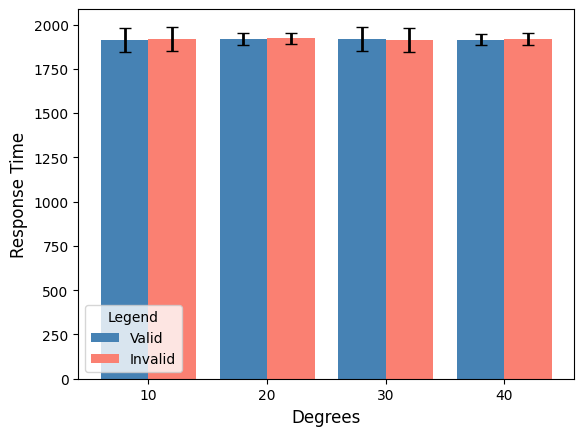

In [31]:
# Define custom color palette
custom_palette = {'Valid': 'steelblue', 'Invalid': 'salmon'}
sem_values = df.groupby(['degrees', 'validity'])['response_rt'].sem().reset_index()
ax = sns.barplot(x='degrees', y='response_rt', hue='validity', palette=custom_palette, ci=None, data=df, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['response_rt']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("Response Time", fontsize=12)

legend_labels = ["Valid", "Invalid"]  # Custom order of labels
handles, _ = ax.get_legend_handles_labels()  # Get the original handles and labels
custom_legend = ax.legend(handles, legend_labels, title="Legend")

plt.savefig(out_path/'RT.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed 

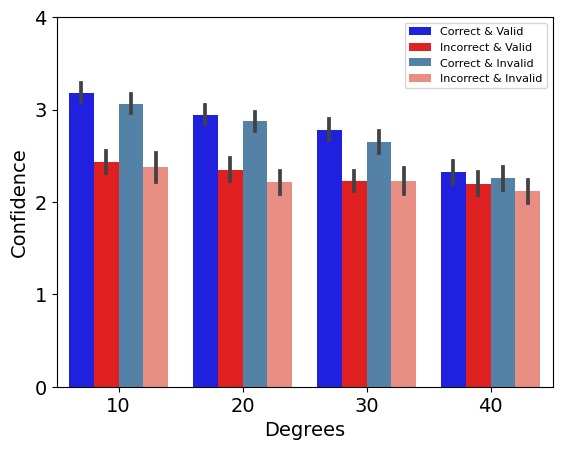

In [32]:
from scipy import stats
map_acc = {0:'Incorrect', 1:'Correct'}
df['correct'] =  df['Accuracy'].map(map_acc)

df['Correct_Valid'] = df['correct'] + ' & ' + df['validity']
cv = df.Correct_Valid.unique()
deg = df.degrees.unique()
corr = df.Accuracy.unique()
valid = df.validity.unique()
part = df.participant.unique()
confFrame = pd.DataFrame()
conf_list = []

x_values = []
y_values = []
yerr_values = []
x_positions = []

#create data frame
for p in part:
    for i in deg:
            for c in cv:
                    subset = df[(df['participant'] == p) & (df['degrees'] == i) & (df['Correct_Valid'] == c)]

                    # Calculate the mean confidence and SEM
                    confidence_mean = subset['Confidence'].mean()
                    confidence_sem = stats.sem(subset['Confidence'])
                    conf_list.append({'participant':p, 'degrees': i, 'Correct_Valid': c, 'confidence': confidence_mean, 'SEM':confidence_sem})
                    x_values.append(i)
                    y_values.append(confidence_mean)
                    yerr_values.append(confidence_sem)

confFrame = pd.DataFrame(conf_list)

fig, ax = plt.subplots()

#set width and palette

bar_width = 0.2

custom_palette = {
    ('Correct & Valid'): 'blue',
    ('Correct & Invalid'): 'steelblue',
    ('Incorrect & Valid'): 'red',
    ('Incorrect & Invalid'): 'salmon'
}

sns.barplot(x='degrees', y='confidence', data=confFrame, errorbar='se', ax=ax, hue='Correct_Valid', dodge=True, palette=custom_palette, hue_order=['Correct & Valid',
                'Incorrect & Valid', 'Correct & Invalid', 'Incorrect & Invalid'])


# Customize the plot
ax.set_ylabel('Confidence')
ax.set_xlabel('Degrees')
ax.set_yticks([0,1,2,3,4])

ax.legend(title='',  loc='upper right', prop={'size': 8})

plt.ylabel('Confidence', fontsize=14)
plt.xlabel('Degrees',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(out_path/'ConfAcc.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

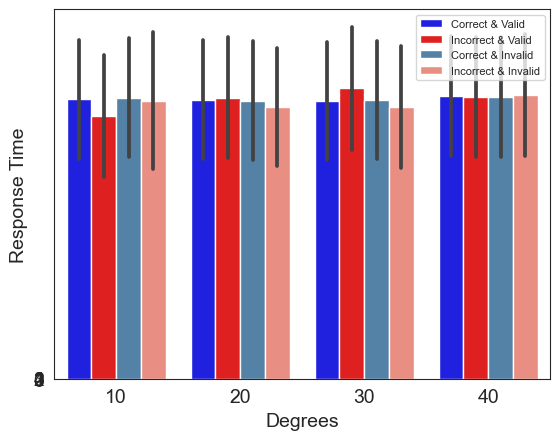

In [32]:
cv = df.Correct_Valid.unique()
deg = df.degrees.unique()
corr = df.Accuracy.unique()
valid = df.validity.unique()
part = df.participant.unique()
RTFrame = pd.DataFrame()
RT_list = []

x_values = []
y_values = []
yerr_values = []
x_positions = []

#create data frame
for p in part:
    for i in deg:
            for c in cv:
                    subset = df[(df['participant'] == p) & (df['degrees'] == i) & (df['Correct_Valid'] == c)]

                    # Calculate the mean confidence and SEM
                    rt_mean = subset['response_rt'].mean()
                    rt_sem = stats.sem(subset['response_rt'])
                    RT_list.append({'participant':p, 'degrees': i, 'Correct_Valid': c, 'response_rt': rt_mean, 'SEM':rt_sem})
                    x_values.append(i)
                    y_values.append(rt_mean)
                    yerr_values.append(rt_sem)

RTFrame = pd.DataFrame(RT_list)

fig, ax = plt.subplots()

#set width and palette

bar_width = 0.2

custom_palette = {
    ('Correct & Valid'): 'blue',
    ('Correct & Invalid'): 'steelblue',
    ('Incorrect & Valid'): 'red',
    ('Incorrect & Invalid'): 'salmon'
}

sns.barplot(x='degrees', y='response_rt', data=RTFrame, errorbar='se', ax=ax, hue='Correct_Valid', dodge=True, palette=custom_palette, hue_order=['Correct & Valid',
                'Incorrect & Valid', 'Correct & Invalid', 'Incorrect & Invalid'])


# Customize the plot
ax.set_ylabel('RT')
ax.set_xlabel('Degrees')
ax.set_yticks([0,1,2,3,4])

ax.legend(title='',  loc='upper right', prop={'size': 8})

plt.ylabel('Response Time', fontsize=14)
plt.xlabel('Degrees',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(out_path/'RTAcc.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

In [33]:
df

,trialsN,participant,validity,Stimuli,Responses,response_rt,Accuracy,Confidence,confidence_rt,degrees,degrees_uncollapsed,trialsPos,correct,Correct_Valid
0,1,1,Valid,1,0.0,908.648994,0.0,2.0,13.754579,30,-30,1,Incorrect,Incorrect & Valid
695,696,1,Valid,1,1.0,4383.191691,1.0,3.0,2.246052,30,-30,174,Correct,Correct & Valid
696,697,1,Invalid,0,0.0,4386.470636,1.0,4.0,2.622767,10,10,174,Correct,Correct & Invalid
697,698,1,Invalid,1,1.0,4390.102385,1.0,4.0,2.214746,10,-10,175,Correct,Correct & Invalid
698,699,1,Invalid,0,0.0,4393.239127,1.0,4.0,2.062660,10,10,176,Correct,Correct & Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,386,33,Valid,0,0.0,0.687428,1.0,1.0,1.995837,10,-10,97,Correct,Correct & Valid
22738,387,33,Invalid,0,0.0,0.770585,1.0,1.0,2.079151,40,-40,97,Correct,Correct & Invalid
22739,388,33,Valid,1,1.0,0.654137,1.0,3.0,1.962655,20,20,96,Correct,Correct & Valid
22726,375,33,Valid,0,0.0,1.821204,1.0,1.0,3.129571,40,-40,92,Correct,Correct & Valid


In [34]:
confFrame

,participant,degrees,Correct_Valid,confidence,SEM
0,1,30,Incorrect & Valid,1.957447,0.171939
1,1,30,Correct & Valid,3.023669,0.083066
2,1,30,Correct & Invalid,2.710526,0.191972
3,1,30,Incorrect & Invalid,2.300000,0.395811
4,1,10,Incorrect & Valid,2.807692,0.254312
...,...,...,...,...,...
379,33,20,Incorrect & Invalid,2.375000,0.263052
380,33,40,Incorrect & Valid,1.378378,0.057314
381,33,40,Correct & Valid,1.580952,0.067369
382,33,40,Correct & Invalid,1.409091,0.142018


In [35]:
means = confFrame.groupby(['Correct_Valid','degrees'])['confidence'].mean()

In [36]:
means

Correct_Valid        degrees
Correct & Invalid    10         3.061144
                     20         2.873809
                     30         2.649486
                     40         2.253643
Correct & Valid      10         3.181118
                     20         2.942687
                     30         2.781521
                     40         2.320840
Incorrect & Invalid  10         2.376318
                     20         2.213643
                     30         2.225900
                     40         2.112985
Incorrect & Valid    10         2.429867
                     20         2.347614
                     30         2.227351
                     40         2.197566
Name: confidence, dtype: float64

In [37]:
x_values = []
part = df.participant.unique()
conf_list = []

#create data frame
for p in part:
        for i in deg:
                for c in cv:
                        subset = df[(df['degrees'] == i) & (df['Correct_Valid'] == c)]

                        # Calculate the mean confidence and SEM
                        confidence_mean = subset['Confidence'].mean()
                        confidence_sem = stats.sem(subset['Confidence'])
                        conf_list.append({'participant':p, 'degrees': i, 'Correct_Valid': c, 'confidence': confidence_mean, 'SEM':confidence_sem})

confFrame2 = pd.DataFrame(conf_list)


In [38]:
confFrame2

,participant,degrees,Correct_Valid,confidence,SEM
0,1,30,Incorrect & Valid,2.310225,0.025614
1,1,30,Correct & Valid,2.831159,0.014366
2,1,30,Correct & Invalid,2.699275,0.033666
3,1,30,Incorrect & Invalid,2.269784,0.052811
4,1,10,Incorrect & Valid,2.579501,0.030653
...,...,...,...,...,...
379,33,20,Incorrect & Invalid,2.353211,0.057020
380,33,40,Incorrect & Valid,2.175726,0.020490
381,33,40,Correct & Valid,2.362263,0.018387
382,33,40,Correct & Invalid,2.276083,0.039497


In [35]:
import warnings

# Ignore all warnings temporarily
warnings.filterwarnings("ignore")

CALCULATE d', C, & META-d'

In [18]:
from metadpy import metad

exceptions_ppt = []
s = None
part = df.participant.unique()
deg = df.degrees.unique()
valid = df.validity.unique()
md_all = pd.DataFrame()
md_i = pd.DataFrame(columns=['participant', 'degrees', 'validity','criterion','dprime_manual','criterion_metadpy'])

for i in part:
    for d in deg:
        for v in valid:
            subj_v_i_d = df.loc[(df['participant']==i)&(df['degrees']==d)&(df['validity']==v)]
            
            nTrials = len(subj_v_i_d)

            stimulus = subj_v_i_d['Stimuli']
            response = subj_v_i_d['Responses']
            rating = subj_v_i_d['Confidence']

            nR_S1, nR_S2 = trials2counts(stimulus,response,rating, 4, padCells=1)

            hits = len(subj_v_i_d[(subj_v_i_d['Stimuli'] == 1) & (subj_v_i_d['Accuracy'] == 1.0)])  # Number of hits
            misses = len(subj_v_i_d[(subj_v_i_d['Stimuli'] == 1) & (subj_v_i_d['Accuracy'] == 0.0)])   # Number of misses
            correct_rejections = len(subj_v_i_d[(subj_v_i_d['Stimuli'] == 0) & (subj_v_i_d['Accuracy'] == 1.0)])   # Number of correct rejections
            false_alarms = len(subj_v_i_d[(subj_v_i_d['Stimuli'] == 0) & (subj_v_i_d['Accuracy'] == 0.0)]) # Number of false alarms
            
            # Calculate hit rate (HR) and false alarm rate (FAR) from trial data
            HR = hits / (hits + misses)
            FAR = false_alarms / (false_alarms + correct_rejections)
            
            #Adjust for inf HR or FAR
            #Macmillan, Neil A., and C. Douglas Creelman. 2004. Detection Theory: A User’s Guide. Psychology Press.

            if HR == 1:
                HR = 1 - 1/(2*nTrials)
            if FAR == 0:
                FAR = 1/(2*nTrials)
            
            # Calculate d'

            # Calculate the Type 1 criterion (c)
            criterion_manual = -((stats.norm.ppf(HR) + stats.norm.ppf(FAR)) / 2)
            dict_data = SDT_MLE_fit(nR_S1, nR_S2)
            s = dict_data.get('s', None) 
            d_prime = 1/s * stats.norm.ppf(HR) - stats.norm.ppf(FAR)
            da = math.sqrt(2/(1+s**2)) * s * d_prime
            ca = (-1/(1+s)) * (stats.norm.ppf(HR) + stats.norm.ppf(FAR))
            
            md_i = fit_meta_d_MLE(nR_S1, nR_S2, s = s)
                
            md_i['participant'] = i
            md_i['degrees'] = d
            md_i['condition'] = subj_v_i_d['condition'].iloc[0]
            md_i['s'] = s
            md_i['ca'] = ca
            md_i['dprime'] = d_prime
            md_i['dprimea'] = da
            
            md_i['Hit Rate'] = HR
            md_i['False Alarm Rate'] = FAR

            # Append data from md_i to md_all
            md_all.append(md_i)
    

data = pd.DataFrame(md_all)

data.to_csv('/Users/josephpruitt/Desktop/exp3/results/data.csv', index=False)

TypeError: trials2counts() got an unexpected keyword argument 'padCells'

In [8]:
mean_far_invalid = data[(data['validity'] == 'Invalid') & (data['degrees'] == 10)]['False Alarm Rate'].mean()
mean_far_invalid

0.13392857142857142

In [ ]:
mean_far_invalid40 = data[(data['validity'] == 'Invalid') & (data['degrees'] == 40)]['False Alarm Rate'].mean()
mean_far_invalid40

0.19363766339869282

In [ ]:
#Delta Confidence

data_list = []
part = df.participant.unique()
deg = df.degrees.unique()
valid = df.validity.unique()
md_i = pd.DataFrame()

for i in part:
    for d in deg:
            for v in valid:
                subj_v_i_d = df.loc[(df['participant']==i)&(df['validity']==v)&(df['degrees']==d)]
                
                data_accuracy_correct = subj_v_i_d[subj_v_i_d['Accuracy'] == 1]
                data_accuracy_incorrect = subj_v_i_d[subj_v_i_d['Accuracy'] == 0]
                
                #delta confidence
                correct_conf = data_accuracy_correct['Confidence'].mean()
                incorrect_conf = data_accuracy_incorrect['Confidence'].mean()
                
                if math.isnan(correct_conf): 
                    correct_conf = 0
                if math.isnan(incorrect_conf): 
                    incorrect_conf = 0
                    
                delta_confidence = incorrect_conf - correct_conf

                data_list.append({'participant': i, 'degrees': d, 'validity':v, 'deltaConfidence': delta_confidence})

md_conf_ = pd.DataFrame(data_list)
md_i = pd.concat([md_i,md_conf_])

In [ ]:
md_i

,participant,degrees,validity,deltaConfidence
0,1,30,Valid,-1.066222
1,1,30,Invalid,-0.410526
2,1,40,Valid,-0.107140
3,1,40,Invalid,-0.355556
4,1,20,Valid,-0.512821
...,...,...,...,...
187,33,40,Invalid,0.090909
188,33,20,Valid,-0.506818
189,33,20,Invalid,-0.425000
190,33,10,Valid,-1.623188


In [ ]:
md_all.to_csv('/Users/josephpruitt/Desktop/exp3/results/SDTdata.csv')

In [ ]:
data = pd.read_csv('/Users/josephpruitt/Desktop/exp3/results/SDTdata.csv')

In [ ]:
data.participant.nunique()

24

PLOT

In [14]:
import warnings
custom_palette = {'Valid': 'steelblue', 'Invalid': 'salmon'}

# Set the custom color palette
sns.set_palette(sns.color_palette(list(custom_palette.values())))

# Set Seaborn style (if needed)
sns.set_style("white")

def plot_function(measure, title, y_ticks=None):
    warnings.filterwarnings("ignore")

    avg = data.groupby(['degrees', 'validity'])[f'{measure}'].mean().reset_index()
    SEM = data.groupby(['degrees', 'validity'])[f'{measure}'].sem().reset_index()

    sns.scatterplot(x='degrees', y=f'{measure}', hue='validity', palette=custom_palette, data=avg, s=100)
    sns.scatterplot(x='degrees', y=f'{measure}', hue='validity', palette=custom_palette, legend=False, alpha=0.3, data=data, s=25)

    for validity, color in zip(avg['validity'].unique(), [custom_palette[val] for val in avg['validity'].unique()]):
        sem_values = SEM[SEM['validity'] == validity][f'{measure}']
        x_values = avg[avg['validity'] == validity]['degrees']
        plt.errorbar(x=x_values, y=avg[avg['validity'] == validity][f'{measure}'], yerr=sem_values, fmt='', color=color, elinewidth=2, capsize=5)

    plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper right')
    plt.xlabel('Degrees')
    plt.ylabel(f'{measure}')
    plt.xticks([10, 20, 30, 40])
    if y_ticks is not None:
        plt.yticks(y_ticks)

    plt.title(f'{title}')

    plt.savefig(out_path/f'{measure}.jpg', format='jpeg', dpi=1000, bbox_inches='tight')
    plt.show()


In [15]:
y_ticks = [-0.2,0,0.2,0.4,0.6,0.8,1]
plot_function('criterion', 'Response Bias')

NameError: name 'data' is not defined

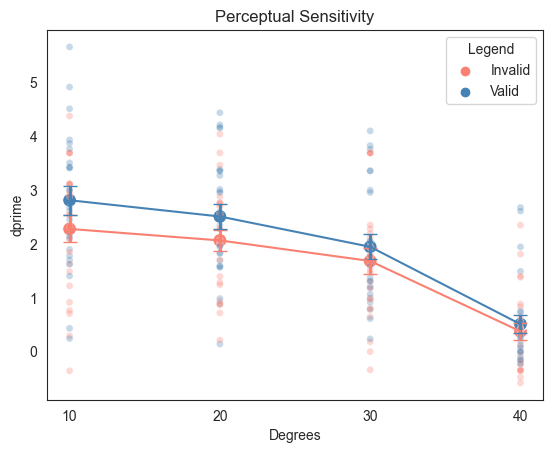

In [ ]:
y_ticks = [0,0.5,1,1.5,2,2.5,3,3.5]
plot_function('dprime', 'Perceptual Sensitivity')

In [16]:
y_ticks = [0,1,2,3,4,5]
plot_function("meta_d", 'Metacognitive Sensitivity',y_ticks)

NameError: name 'data' is not defined

In [17]:
y_ticks = [-1.0,0,1,2,3]
plot_function('m_ratio', 'Metacognitive Efficiency',y_ticks)

NameError: name 'data' is not defined

In [ ]:
plot_function_b('m_diff', 'Metacognitive Efficiency',y_ticks)

NameError: name 'plot_function_b' is not defined

OTHER PlOTS

In [ ]:
custom_palette = {'Valid': 'steelblue', 'Invalid': 'salmon'}

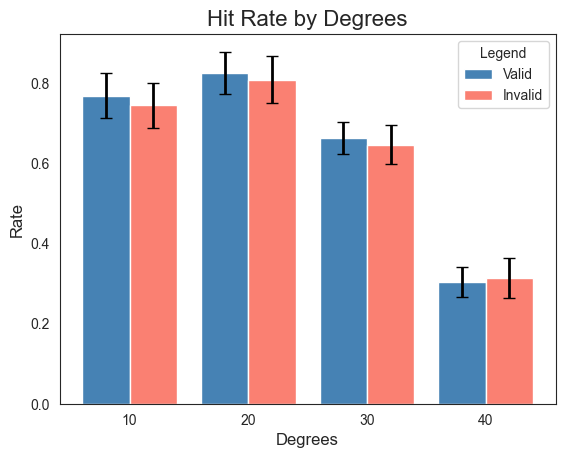

In [ ]:
sem_values = md_all.groupby(['degrees', 'validity'])['Hit Rate'].sem().reset_index()
ax = sns.barplot(x='degrees', y='Hit Rate', hue='validity', palette = custom_palette, ci=None, data=md_all, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['Hit Rate']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.title("Hit Rate by Degrees", fontsize=16)

legend_labels = ["Valid", "Invalid"]  # Custom order of labels
handles, _ = ax.get_legend_handles_labels()  # Get the original handles and labels
custom_legend = ax.legend(handles, legend_labels, title="Legend")
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.savefig(out_path/'HitRate.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

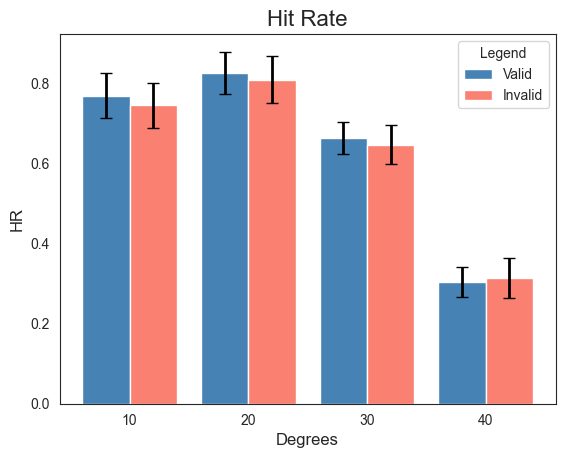

In [ ]:
sem_values = md_all.groupby(['degrees', 'validity'])['Hit Rate'].sem().reset_index()
ax = sns.barplot(x='degrees', y='Hit Rate', hue='validity', ci=None, data=md_all, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['Hit Rate']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.title("Hit Rate", fontsize=16)

legend_labels = ["Valid", "Invalid"]  # Custom order of labels
handles, _ = ax.get_legend_handles_labels()  # Get the original handles and labels
custom_legend = ax.legend(handles, legend_labels, title="Legend")
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.savefig(out_path/'HitRate.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

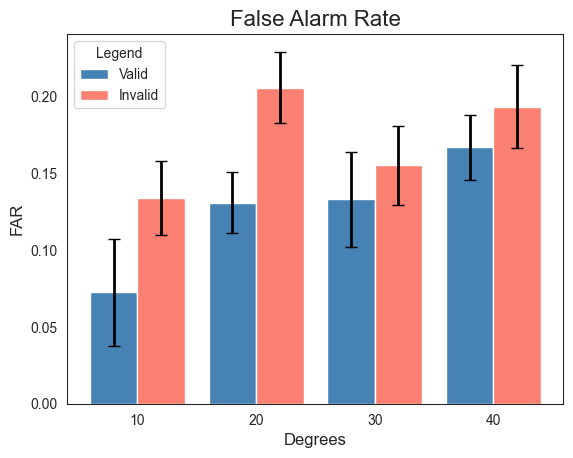

In [ ]:
sem_values = md_all.groupby(['degrees', 'validity'])['False Alarm Rate'].sem().reset_index()
ax = sns.barplot(x='degrees', y='False Alarm Rate', hue='validity', ci=None, data=md_all, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['False Alarm Rate']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("FAR", fontsize=12)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.title("False Alarm Rate", fontsize=16)

legend_labels = ["Valid", "Invalid"]  # Custom order of labels
handles, _ = ax.get_legend_handles_labels()  # Get the original handles and labels
custom_legend = ax.legend(handles, legend_labels, title="Legend")

plt.savefig(out_path/'FAR.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

2x5 REPEATED MEASURE ANOVAS

In [ ]:
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data['EccsAndAttention'] = data['degrees'].astype(str) + data['validity']

In [ ]:
def run_anova(measure):
    anova_model = AnovaRM(data, depvar=f'{measure}', subject='participant', within=['degrees', 'validity'])

    # Fit the model
    results = anova_model.fit()
    print(f'{measure} ANOVA')
    print(' ')

    # Print the ANOVA table
    print(results.summary())

    # Get the p-values for the main effects and interactions
    p_values = results.anova_table['Pr > F']

    # Interpret the results based on the p-values
    alpha = 0.05  # Set your significance level
    if p_values['degrees'] < alpha:
        print("Reject the null hypothesis for degrees")
    else:
        print("Fail to reject the null hypothesis for degrees")

    if p_values['validity'] < alpha:
        print("Reject the null hypothesis for validity")
    else:
        print("Fail to reject the null hypothesis for validity")

    if p_values['degrees:validity'] < alpha:
        print("Reject the null hypothesis for the interaction")
    else:
        print("Fail to reject the null hypothesis for the interaction")

    print('')
    print('')

In [ ]:
valid = data.validity.unique()
deg = [10,20,30,40]
EccA = data.EccsAndAttention.unique()
deltConf = md_i.deltaConfidence.unique()

def calc_mean_and_std(var, name, measure):
    results = []
    for v in var:
        # Filter rows where 'degrees' is equal to the current value
        filtered_rows = data[data[f'{name}'] == v]
        
        # Calculate the mean of 'dprime' for the filtered rows
        mean = filtered_rows[f'{measure}'].mean()
        std = filtered_rows[f'{measure}'].std()
        
        results.append([v, mean, std])

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame(results, columns=[f'{name}', f'Mean_{measure}', f'Std_{measure}'])

    print(f'{measure} results')
    print(result_df)
    print('')

In [ ]:
run_anova('False Alarm Rate')

posthoc0 = pairwise_tukeyhsd(data['False Alarm Rate'], data['degrees'], alpha=0.05)
print(posthoc0)

print('')
print('')

posthoc1 = pairwise_tukeyhsd(data['False Alarm Rate'], data['validity'], alpha=0.05)
print(posthoc1)

print('')
print('')

posthoc2 = pairwise_tukeyhsd(data['False Alarm Rate'], data['EccsAndAttention'], alpha=0.05)
print(posthoc2)

calc_mean_and_std(deg, 'degrees', 'False Alarm Rate')
calc_mean_and_std(valid, 'validity', 'False Alarm Rate')
calc_mean_and_std(EccA, 'EccsAndAttention', 'False Alarm Rate')

False Alarm Rate ANOVA
 
                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
degrees           9.3568 3.0000 57.0000 0.0000
validity         13.2371 1.0000 19.0000 0.0017
degrees:validity  3.0306 3.0000 57.0000 0.0366

Reject the null hypothesis for degrees
Reject the null hypothesis for validity
Reject the null hypothesis for the interaction


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    10     20   0.0587 0.1847 -0.0167 0.1341  False
    10     30   0.0429 0.4529 -0.0325 0.1184  False
    10     40   0.0821 0.0271  0.0066 0.1575   True
    20     30  -0.0158 0.9484 -0.0912 0.0597  False
    20     40   0.0234 0.8523 -0.0521 0.0988  False
    30     40   0.0391 0.5347 -0.0363 0.1145  False
---------------------------------------------------


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 g

In [ ]:
md_i

,participant,degrees,validity,deltaConfidence
0,1,30,Valid,-1.066222
1,1,30,Invalid,-0.410526
2,1,10,Valid,-0.887045
3,1,10,Invalid,-0.857143
4,1,20,Valid,-0.512821
...,...,...,...,...
155,26,10,Invalid,-1.108696
156,26,20,Valid,-0.459867
157,26,20,Invalid,-0.750000
158,26,40,Valid,-0.045455


In [ ]:
run_anova('dprime')

posthoc1 = pairwise_tukeyhsd(data['dprime'], data['degrees'], alpha=0.05)
print(posthoc1)

print('')
print('')

posthoc2 = pairwise_tukeyhsd(data['dprime'], data['validity'], alpha=0.05)
print(posthoc2)

print('')
print('')

posthoc3 = pairwise_tukeyhsd(data['dprime'], data['EccsAndAttention'], alpha=0.05)
print(posthoc3)

print('')
print('')
calc_mean_and_std(deg, 'degrees', 'dprime')
calc_mean_and_std(valid, 'validity', 'dprime')
calc_mean_and_std(EccA, 'EccsAndAttention', 'dprime')

dprime ANOVA
 
                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
degrees          55.1358 3.0000 57.0000 0.0000
validity         16.9846 1.0000 19.0000 0.0006
degrees:validity  2.3675 3.0000 57.0000 0.0803

Reject the null hypothesis for degrees
Reject the null hypothesis for validity
Fail to reject the null hypothesis for the interaction


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    10     20  -0.2893  0.684 -0.9662  0.3876  False
    10     30  -0.6902 0.0438 -1.3671 -0.0133   True
    10     40  -2.2992    0.0 -2.9761 -1.6223   True
    20     30  -0.4009 0.4173 -1.0778   0.276  False
    20     40  -2.0099    0.0 -2.6868  -1.333   True
    30     40   -1.609    0.0 -2.2859 -0.9321   True
----------------------------------------------------


Multiple Comparison of Means - Tukey HSD, FWER=0.05
 gr

In [ ]:
run_anova('criterion')

#Posthoc for criterion (degrees factor)
posthoc1 = pairwise_tukeyhsd(data['criterion'], data['degrees'], alpha=0.05)
print(posthoc1)

calc_mean_and_std(deg, 'degrees', 'criterion')

criterion ANOVA
 
                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
degrees          26.6365 3.0000 57.0000 0.0000
validity          1.0446 1.0000 19.0000 0.3196
degrees:validity  0.6821 3.0000 57.0000 0.5667

Reject the null hypothesis for degrees
Fail to reject the null hypothesis for validity
Fail to reject the null hypothesis for the interaction


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    10     20    -0.38 0.0336 -0.7391 -0.0209   True
    10     30   -0.148 0.7082 -0.5071  0.2112  False
    10     40   0.4421  0.009  0.0829  0.8012   True
    20     30    0.232  0.339 -0.1271  0.5911  False
    20     40   0.8221    0.0  0.4629  1.1812   True
    30     40   0.5901 0.0002  0.2309  0.9492   True
----------------------------------------------------
criterion results
   degrees  Mean_criterion  

In [ ]:
run_anova('meta_d')
posthoc1 = pairwise_tukeyhsd(data['meta_d'], data['degrees'], alpha=0.05)
print(posthoc1)

print('')
print('')

posthoc2 = pairwise_tukeyhsd(data['meta_d'], data['validity'], alpha=0.05)
print(posthoc2)

calc_mean_and_std(deg, 'degrees', 'meta_d')
calc_mean_and_std(valid, 'validity', 'meta_d')

NameError: name 'run_anova' is not defined

In [ ]:
run_anova('m_diff')

posthoc4 = pairwise_tukeyhsd(data['m_diff'], data['EccsAndAttention'], alpha=0.05)
print(posthoc4)

calc_mean_and_std(EccA, 'EccsAndAttention', 'm_diff')

m_diff ANOVA
 
                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
degrees           1.1380 3.0000 57.0000 0.3415
validity          2.6854 1.0000 19.0000 0.1177
degrees:validity  2.9587 3.0000 57.0000 0.0398

Fail to reject the null hypothesis for degrees
Fail to reject the null hypothesis for validity
Reject the null hypothesis for the interaction


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
10Invalid   10Valid  -0.3469 0.9632 -1.3491 0.6553  False
10Invalid 20Invalid   0.1157    1.0 -0.8865 1.1179  False
10Invalid   20Valid  -0.4505 0.8643 -1.4527 0.5517  False
10Invalid 30Invalid  -0.3082  0.981 -1.3104 0.6939  False
10Invalid   30Valid   0.1219 0.9999 -0.8803 1.1241  False
10Invalid 40Invalid   0.1498 0.9998 -0.8524  1.152  False
10Invalid   40Valid   0.0884    1.0 -0.9138 1.0905  False

In [ ]:
run_anova('m_ratio')

print('')
print('')

posthoc5 = pairwise_tukeyhsd(data['m_ratio'], data['EccsAndAttention'], alpha=0.05)
print(posthoc5)
calc_mean_and_std(EccA, 'EccsAndAttention', 'm_ratio')

COMPARE MATLAB & PYTHON RESULTS

In [33]:
import scipy.io
mat = scipy.io.loadmat('StimulusMatchedExperimentOutputs.mat')

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [34]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'invalid10AverageConfidence', 'invalid10AverageCorrectConfidence', 'invalid10AverageIncorrectConfidence', 'invalid10Dprime', 'invalid10DprimeA', 'invalid10Mdiff', 'invalid10MetaDprime', 'invalid10Mratio', 'invalid10Type1criterion', 'invalid10falseAlarmRate', 'invalid10hitRate', 'invalid10s', 'invalid20AverageConfidence', 'invalid20AverageCorrectConfidence', 'invalid20AverageIncorrectConfidence', 'invalid20Dprime', 'invalid20DprimeA', 'invalid20Mdiff', 'invalid20MetaDprime', 'invalid20Mratio', 'invalid20Type1criterion', 'invalid20falseAlarmRate', 'invalid20hitRate', 'invalid20s', 'invalid30AverageConfidence', 'invalid30AverageCorrectConfidence', 'invalid30AverageIncorrectConfidence', 'invalid30Dprime', 'invalid30DprimeA', 'invalid30Mdiff', 'invalid30MetaDprime', 'invalid30Mratio', 'invalid30Type1criterion', 'invalid30falseAlarmRate', 'invalid30hitRate', 'invalid30s', 'invalid40AverageConfidence', 'invalid40AverageCorrectConfidence',

In [35]:
df_mat = pd.DataFrame({
    'valid10MetaDPrime': mat['valid10AverageCorrectConfidence'].flatten(),
    'invalid10AverageCorrectConfidence': mat['invalid10AverageCorrectConfidence'].flatten(),
    'invalid20AverageCorrectConfidence': mat['invalid20AverageCorrectConfidence'].flatten(),
    'valid20AverageCorrectConfidence': mat['valid20AverageCorrectConfidence'].flatten(),
    'invalid30AverageCorrectConfidence': mat['invalid30AverageCorrectConfidence'].flatten(),
    'valid30AverageCorrectConfidence': mat['valid30AverageCorrectConfidence'].flatten(),
    'invalid40AverageCorrectConfidence': mat['invalid40AverageCorrectConfidence'].flatten(),
    'valid40AverageCorrectConfidence': mat['valid40AverageCorrectConfidence'].flatten()
})

In [36]:
import pandas as pd
df_mat = pd.DataFrame({
    'valid10AverageCorrectConfidence': mat['valid10AverageCorrectConfidence'].flatten(),
    'invalid10AverageCorrectConfidence': mat['invalid10AverageCorrectConfidence'].flatten(),
    'invalid20AverageCorrectConfidence': mat['invalid20AverageCorrectConfidence'].flatten(),
    'valid20AverageCorrectConfidence': mat['valid20AverageCorrectConfidence'].flatten(),
    'invalid30AverageCorrectConfidence': mat['invalid30AverageCorrectConfidence'].flatten(),
    'valid30AverageCorrectConfidence': mat['valid30AverageCorrectConfidence'].flatten(),
    'invalid40AverageCorrectConfidence': mat['invalid40AverageCorrectConfidence'].flatten(),
    'valid40AverageCorrectConfidence': mat['valid40AverageCorrectConfidence'].flatten()
})

In [37]:
df_mat = pd.DataFrame()
d_arr = []
v_arr = []
c_arr = []
for d in [10,20,30,40]:
    for v in ['valid','invalid']:
        for c in ['Correct','Incorrect']:
            
            d_arr.append(d)
            v_arr.append(v)
            c_arr.append(c)

            df_mat[f'{v}{d}Average{c}Confidence'] = mat[f'{v}{d}Average{c}Confidence'].flatten()
            

In [38]:
df_mat

,valid10AverageCorrectConfidence,valid10AverageIncorrectConfidence,invalid10AverageCorrectConfidence,invalid10AverageIncorrectConfidence,valid20AverageCorrectConfidence,valid20AverageIncorrectConfidence,invalid20AverageCorrectConfidence,invalid20AverageIncorrectConfidence,valid30AverageCorrectConfidence,valid30AverageIncorrectConfidence,invalid30AverageCorrectConfidence,invalid30AverageIncorrectConfidence,valid40AverageCorrectConfidence,valid40AverageIncorrectConfidence,invalid40AverageCorrectConfidence,invalid40AverageIncorrectConfidence
0,3.694737,2.807692,3.523810,2.666667,3.179487,2.666667,3.200000,2.000000,3.023669,1.957447,2.710526,2.300000,1.796460,1.689320,1.800000,1.444444
1,2.802083,2.666667,2.977273,1.750000,2.792929,1.722222,2.825000,1.625000,2.540107,1.551724,2.450000,2.000000,1.483607,1.276596,1.500000,1.250000
2,3.636816,1.933333,3.238095,3.000000,3.201183,2.872340,3.028571,2.384615,3.034722,2.486111,2.818182,2.200000,2.571429,2.384615,2.000000,2.190476
3,3.264151,1.500000,3.400000,NaN,2.677852,1.636364,2.531250,1.500000,2.328467,1.840000,1.827586,2.000000,2.116883,1.911392,2.117647,1.736842
4,3.223529,2.282609,3.281250,2.750000,3.021739,2.564103,3.187500,2.625000,3.059603,2.738462,2.862069,2.736842,2.761905,2.792793,2.818182,2.692308
5,3.791667,NaN,3.456522,1.000000,3.391304,1.444444,3.195652,2.000000,3.160976,1.363636,3.108696,1.000000,2.513228,2.000000,2.452381,1.666667
6,2.844086,2.766667,2.761905,2.666667,2.451456,2.200000,2.234043,1.000000,2.250000,2.232143,1.972222,2.166667,2.099099,2.123810,1.869565,1.720000
7,3.322835,3.134831,3.133333,3.222222,2.986928,2.761905,2.758621,2.526316,2.871795,2.858586,2.680000,2.347826,2.389831,2.377551,2.043478,2.040000
8,3.099415,2.444444,3.000000,2.384615,2.958580,2.574468,2.942857,2.692308,2.758389,2.119403,2.761905,2.166667,1.663462,1.723214,2.040000,1.869565
9,2.456140,2.355556,2.346154,2.409091,2.447059,2.260870,2.516129,2.176471,2.439490,2.389831,2.451613,2.235294,2.400000,2.333333,2.379310,2.473684


In [39]:
df_mat_mean = df_mat.mean().reset_index(name='avg. confidence')

In [40]:
len(d_arr),df_mat_mean.shape

(16, (16, 2))

In [41]:
df_mat_mean['degrees'] = d_arr
df_mat_mean['cue'] = v_arr
df_mat_mean['accuracy'] = c_arr

In [42]:
df_mat_mean['cue_acc'] = df_mat_mean['accuracy'] + ' & ' + df_mat_mean['cue']
df_mat_mean['Correct_Valid'] = df_mat_mean['cue_acc'].str.lower()
df_mat_mean

,index,avg. confidence,degrees,cue,accuracy,cue_acc,Correct_Valid
0,valid10AverageCorrectConfidence,3.235378,10,valid,Correct,Correct & valid,correct & valid
1,valid10AverageIncorrectConfidence,2.444207,10,valid,Incorrect,Incorrect & valid,incorrect & valid
2,invalid10AverageCorrectConfidence,3.125620,10,invalid,Correct,Correct & invalid,correct & invalid
3,invalid10AverageIncorrectConfidence,2.287122,10,invalid,Incorrect,Incorrect & invalid,incorrect & invalid
4,valid20AverageCorrectConfidence,3.006740,20,valid,Correct,Correct & valid,correct & valid
5,valid20AverageIncorrectConfidence,2.338718,20,valid,Incorrect,Incorrect & valid,incorrect & valid
6,invalid20AverageCorrectConfidence,2.938442,20,invalid,Correct,Correct & invalid,correct & invalid
7,invalid20AverageIncorrectConfidence,2.212622,20,invalid,Incorrect,Incorrect & invalid,incorrect & invalid
8,valid30AverageCorrectConfidence,2.858765,30,valid,Correct,Correct & valid,correct & valid
9,valid30AverageIncorrectConfidence,2.219101,30,valid,Incorrect,Incorrect & valid,incorrect & valid


In [43]:
confFrame['Correct_Valid'] = confFrame['Correct_Valid'].str.lower() 

In [44]:
confFrame

,participant,degrees,Correct_Valid,confidence,SEM
0,1,30,incorrect & valid,1.957447,0.171939
1,1,30,correct & valid,3.023669,0.083066
2,1,30,correct & invalid,2.710526,0.191972
3,1,30,incorrect & invalid,2.300000,0.395811
4,1,10,incorrect & valid,2.807692,0.254312
...,...,...,...,...,...
379,33,20,incorrect & invalid,2.375000,0.263052
380,33,40,incorrect & valid,1.378378,0.057314
381,33,40,correct & valid,1.580952,0.067369
382,33,40,correct & invalid,1.409091,0.142018


In [45]:
confFrame.sort_values('degrees')

,participant,degrees,Correct_Valid,confidence,SEM
357,32,10,correct & valid,2.550000,0.057639
164,13,10,incorrect & valid,4.000000,0.000000
87,7,10,incorrect & invalid,1.000000,0.000000
86,7,10,correct & invalid,3.456522,0.106352
85,7,10,correct & valid,3.791667,0.034609
...,...,...,...,...,...
220,18,40,incorrect & valid,1.527778,0.053371
221,18,40,correct & valid,1.629630,0.051948
222,18,40,correct & invalid,1.476190,0.111677
382,33,40,correct & invalid,1.409091,0.142018


In [46]:
df_mat_mean

,index,avg. confidence,degrees,cue,accuracy,cue_acc,Correct_Valid
0,valid10AverageCorrectConfidence,3.235378,10,valid,Correct,Correct & valid,correct & valid
1,valid10AverageIncorrectConfidence,2.444207,10,valid,Incorrect,Incorrect & valid,incorrect & valid
2,invalid10AverageCorrectConfidence,3.125620,10,invalid,Correct,Correct & invalid,correct & invalid
3,invalid10AverageIncorrectConfidence,2.287122,10,invalid,Incorrect,Incorrect & invalid,incorrect & invalid
4,valid20AverageCorrectConfidence,3.006740,20,valid,Correct,Correct & valid,correct & valid
5,valid20AverageIncorrectConfidence,2.338718,20,valid,Incorrect,Incorrect & valid,incorrect & valid
6,invalid20AverageCorrectConfidence,2.938442,20,invalid,Correct,Correct & invalid,correct & invalid
7,invalid20AverageIncorrectConfidence,2.212622,20,invalid,Incorrect,Incorrect & invalid,incorrect & invalid
8,valid30AverageCorrectConfidence,2.858765,30,valid,Correct,Correct & valid,correct & valid
9,valid30AverageIncorrectConfidence,2.219101,30,valid,Incorrect,Incorrect & valid,incorrect & valid


In [47]:
merged = confFrame.merge(df_mat_mean,on=['degrees','Correct_Valid'])
merged1 = merged[['degrees','Correct_Valid','confidence','avg. confidence']]
merged1.sort_values('degrees')

,degrees,Correct_Valid,confidence,avg. confidence
191,10,incorrect & invalid,3.333333,2.287122
121,10,correct & valid,2.802083,3.235378
122,10,correct & valid,3.636816,3.235378
123,10,correct & valid,3.264151,3.235378
124,10,correct & valid,3.223529,3.235378
...,...,...,...,...
314,40,correct & valid,2.571429,2.364506
313,40,correct & valid,1.483607,2.364506
312,40,correct & valid,1.796460,2.364506
334,40,correct & valid,1.361702,2.364506


MetaDPY with S input

In [48]:
import pandas as pd
master_data = pd.read_csv(data_path/'masterMATLABdataOutputs.csv')
# Assuming you have master_data and columns_to_transfer defined

# Convert column names to uppercase in master_data
master_data.columns = master_data.columns.str.upper()

# List of columns in master data file
columns_to_transfer = master_data.columns
final_df = pd.DataFrame()
new_df_pivoted = pd.DataFrame()
new_df = pd.DataFrame()
melted_df = pd.DataFrame()
# Create an empty list to store DataFrames
dfs = []

# Iterate through each unique prefix in the column names
for prefix in set(col.split('_')[0] for col in columns_to_transfer):
    prefix_columns = [col for col in columns_to_transfer if col.startswith(prefix)]

    # Check if there are columns with the current prefix
    if prefix_columns:
        # Extract participant, degrees, and validity information
        participant = master_data['SUBJECTID']  # Change 'subjectID' to 'SUBJECTID'

        # Extracting digits only if they are present, otherwise use NaN
        degrees = int(''.join(filter(str.isdigit, prefix_columns[0]))) if any(char.isdigit() for char in prefix_columns[0]) else float('nan')

        # Determine validity based on case-insensitive search
        validity = 'Unknown'
        for col in prefix_columns:
            if 'INVALID' in col.upper():
                validity = 'Invalid'
                break
            elif 'VALID' in col.upper():
                validity = 'Valid'
                break

        # Melt the dataframe with a unique name for the melted column
        melted_df = pd.melt(master_data, id_vars=['SUBJECTID'], value_vars=prefix_columns, var_name='original_column', value_name='melted_value')

        # Merge melted data with participant, degrees, and validity information
        new_df = pd.merge(melted_df, pd.DataFrame({'SUBJECTID': participant, 'degrees': degrees, 'validity': validity}), on=['SUBJECTID'])

        # Extract the part before "INVALID" or "VALID" from the original_column
        new_df['prefix'] = new_df['original_column'].apply(lambda x: x.split('VALID')[0].split('INVALID')[0] if 'INVALID' in x.upper() else x.split('VALID')[0] if 'VALID' in x.upper() else x)
        new_df['prefix'] = new_df['prefix'].apply(lambda x: x[:-2] if x[-2:] == 'IN' else x)
        # Directly pivot the melted column back to the desired structure
        
        new_df_pivoted = new_df.pivot_table(index=['SUBJECTID', 'degrees', 'validity'], columns='prefix', values='melted_value', aggfunc='first').reset_index()
        
        # Append the new DataFrame to the list
        dfs.append(new_df_pivoted)
       
merged_df = pd.concat(dfs)

# Merge the concatenated DataFrame on 'degrees', 'validity'
final_df = merged_df.groupby(['SUBJECTID', 'degrees', 'validity']).first().reset_index()

# Reset the index
final_df.reset_index(drop=True, inplace=True)
final_df.columns = final_df.columns.str.lower()

# Display the final DataFrame
final_df.to_csv('/Users/josephpruitt/Desktop/exp3/results/brian_data.csv', index=False)
final_df

prefix,subjectid,degrees,validity,hitrate,falsealarms,mratio,avgcorrectconf,s,avgconf,dprimea,criterion,criteriona,dprime,metadprimeusings,mdiff,avgincorrectconf
0,1,10.0,Invalid,0.791667,0.041667,0.903190,3.523810,0.449696,3.416667,1.891444,0.459723,-0.020958,2.543882,1.714046,-0.183723,2.666667
1,1,10.0,Valid,0.796296,0.037037,0.993468,3.694737,0.374067,3.587963,2.083517,0.478845,-0.103029,2.614620,1.932129,-0.012703,2.807692
2,1,20.0,Invalid,0.916667,0.250000,1.179654,3.200000,0.766054,3.000000,2.124094,-0.354252,-0.511905,2.057484,2.349914,0.357877,2.000000
3,1,20.0,Valid,0.907407,0.101852,0.299322,3.179487,0.625765,3.129630,2.084213,-0.026944,-0.248171,2.596028,0.748341,-1.751779,2.666667
4,1,30.0,Invalid,0.708333,0.125000,0.239090,2.710526,1.119165,2.625000,1.242983,0.300914,0.280706,1.698872,0.390530,-1.242870,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,33,20.0,Valid,0.870370,0.240741,0.727892,2.681818,0.615156,2.587963,1.750116,-0.212111,-0.400420,1.832065,1.350708,-0.504936,2.175000
188,33,30.0,Invalid,0.500000,0.166667,0.878037,2.218750,0.710005,2.104167,0.774553,0.483711,0.339895,0.967422,0.658028,-0.091403,1.875000
189,33,30.0,Valid,0.555556,0.120370,0.776105,2.154839,0.568038,2.060185,0.924511,0.516714,0.309055,1.312848,0.758748,-0.218888,1.819672
190,33,40.0,Invalid,0.125000,0.208333,0.854090,1.409091,0.915119,1.458333,-0.339156,0.981284,0.932699,-0.338132,-0.332967,0.056883,1.500000


In [49]:
final_df['cprime'] = final_df['criteriona'] / final_df['dprimea']

In [50]:
final_df

prefix,subjectid,degrees,validity,hitrate,falsealarms,mratio,avgcorrectconf,s,avgconf,dprimea,criterion,criteriona,dprime,metadprimeusings,mdiff,avgincorrectconf,cprime
0,1,10.0,Invalid,0.791667,0.041667,0.903190,3.523810,0.449696,3.416667,1.891444,0.459723,-0.020958,2.543882,1.714046,-0.183723,2.666667,-0.011081
1,1,10.0,Valid,0.796296,0.037037,0.993468,3.694737,0.374067,3.587963,2.083517,0.478845,-0.103029,2.614620,1.932129,-0.012703,2.807692,-0.049450
2,1,20.0,Invalid,0.916667,0.250000,1.179654,3.200000,0.766054,3.000000,2.124094,-0.354252,-0.511905,2.057484,2.349914,0.357877,2.000000,-0.240999
3,1,20.0,Valid,0.907407,0.101852,0.299322,3.179487,0.625765,3.129630,2.084213,-0.026944,-0.248171,2.596028,0.748341,-1.751779,2.666667,-0.119072
4,1,30.0,Invalid,0.708333,0.125000,0.239090,2.710526,1.119165,2.625000,1.242983,0.300914,0.280706,1.698872,0.390530,-1.242870,2.300000,0.225833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,33,20.0,Valid,0.870370,0.240741,0.727892,2.681818,0.615156,2.587963,1.750116,-0.212111,-0.400420,1.832065,1.350708,-0.504936,2.175000,-0.228796
188,33,30.0,Invalid,0.500000,0.166667,0.878037,2.218750,0.710005,2.104167,0.774553,0.483711,0.339895,0.967422,0.658028,-0.091403,1.875000,0.438826
189,33,30.0,Valid,0.555556,0.120370,0.776105,2.154839,0.568038,2.060185,0.924511,0.516714,0.309055,1.312848,0.758748,-0.218888,1.819672,0.334290
190,33,40.0,Invalid,0.125000,0.208333,0.854090,1.409091,0.915119,1.458333,-0.339156,0.981284,0.932699,-0.338132,-0.332967,0.056883,1.500000,-2.750059


In [65]:
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.multitest import multipletests

anova_results = AnovaRM(final_df, 'mratio', 'subjectid', within=['degrees', 'validity']).fit()

final_df['degrees'] = pd.to_numeric(final_df['degrees'])

final_df['EccsAndAttention'] = final_df['degrees'].astype(str) + '_' + final_df['validity']

# Print the ANOVA results
print(anova_results)

interaction_posthoc = pairwise_tukeyhsd(final_df['mratio'], final_df['EccsAndAttention'], alpha=0.05)
print(interaction_posthoc)

reject, adjusted_p_values, _, _ = multipletests(interaction_posthoc.pvalues, method='holm')

# Create a DataFrame with the corrected p-values
print(adjusted_p_values)


/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_83674/1033786077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['degrees'] = pd.to_numeric(final_df['degrees'])
/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_83674/1033786077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['EccsAndAttention'] = final_df['degrees'].astype(str) + '_' + final_df['validity']


                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
degrees           0.1389 2.0000 46.0000 0.8707
validity          0.0026 1.0000 23.0000 0.9597
degrees:validity  2.4674 2.0000 46.0000 0.0960

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
10.0_Invalid   10.0_Valid   0.2165 0.8212  -0.292 0.7251  False
10.0_Invalid 20.0_Invalid   0.2384 0.7537 -0.2702 0.7469  False
10.0_Invalid   20.0_Valid   0.0141    1.0 -0.4945 0.5226  False
10.0_Invalid 30.0_Invalid   0.1533 0.9528 -0.3553 0.6618  False
10.0_Invalid   30.0_Valid    0.175 0.9191 -0.3336 0.6835  False
  10.0_Valid 20.0_Invalid   0.0219    1.0 -0.4867 0.5304  False
  10.0_Valid   20.0_Valid  -0.2024 0.8592  -0.711 0.3061  False
  10.0_Valid 30.0_Invalid  -0.0632 0.9992 -0.5718 0.4453  False
  10.0_Valid   30.0_Valid  -0.0415

In [62]:
from scipy.stats import ttest_ind

groups = final_df['EccsAndAttention'].unique()
p_values = []
comparisons = []

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = final_df[final_df['EccsAndAttention'] == groups[i]]['mratio']
        group2 = final_df[final_df['EccsAndAttention'] == groups[j]]['mratio']
        t_stat, p_val = ttest_ind(group1, group2)
        p_values.append(p_val)
        comparisons.append(f'{groups[i]} vs {groups[j]}')

# Apply Bonferroni correction
reject, adjusted_p_values, _, _ = multipletests(p_values, method='bonferroni')

# Create a DataFrame for better visualization
posthoc_results = pd.DataFrame({
    'Comparison': comparisons,
    'p-value': p_values,
    'Reject null hypothesis': reject,
    'Adjusted p-value': adjusted_p_values
})

print(posthoc_results)

                      Comparison   p-value  Reject null hypothesis  \
0     10.0_Invalid vs 10.0_Valid  0.141434                   False   
1   10.0_Invalid vs 20.0_Invalid  0.124025                   False   
2     10.0_Invalid vs 20.0_Valid  0.939967                   False   
3   10.0_Invalid vs 30.0_Invalid  0.462698                   False   
4     10.0_Invalid vs 30.0_Valid  0.195991                   False   
5     10.0_Valid vs 20.0_Invalid  0.880319                   False   
6       10.0_Valid vs 20.0_Valid  0.266170                   False   
7     10.0_Valid vs 30.0_Invalid  0.754890                   False   
8       10.0_Valid vs 30.0_Valid  0.740236                   False   
9     20.0_Invalid vs 20.0_Valid  0.233712                   False   
10  20.0_Invalid vs 30.0_Invalid  0.682512                   False   
11    20.0_Invalid vs 30.0_Valid  0.636045                   False   
12    20.0_Valid vs 30.0_Invalid  0.552993                   False   
13      20.0_Valid v

In [52]:
result = final_df.groupby('degrees')['avgincorrectconf'].agg(['mean', 'std'])
# Display the result
print(result)

             mean       std
degrees                    
10.0     2.403093  0.664786
20.0     2.280629  0.607034
30.0     2.226625  0.599575
40.0     2.155275  0.607246


In [53]:
result = final_df.groupby('degrees')['avgincorrectconf'].agg(['mean', 'std'])
# Display the result
print(result)

             mean       std
degrees                    
10.0     2.403093  0.664786
20.0     2.280629  0.607034
30.0     2.226625  0.599575
40.0     2.155275  0.607246


In [54]:
from scipy.stats import ttest_1samp


# Group by 'degrees' and perform a one-sided t-test for each group
groups = final_df.groupby('degrees')['criteriona']

# One-sided t-test (alternative='greater' for values greater than the expected value)
results = groups.apply(lambda x: ttest_1samp(x, popmean=0, alternative='greater'))

p_values = results.apply(lambda x: x.pvalue)
print(p_values)
# Display the results
print(results)

degrees
10.0    1.259921e-01
20.0    9.911983e-01
30.0    9.598088e-02
40.0    5.566542e-13
Name: criteriona, dtype: float64
degrees
10.0     (1.1598098579343052, 0.12599214796514938)
20.0     (-2.4605342234150323, 0.9911983376396594)
30.0     (1.3238320949695337, 0.09598087787046773)
40.0    (9.616700697686237, 5.566541687008267e-13)
Name: criteriona, dtype: object


In [55]:
result1 = final_df.groupby('degrees')['s'].agg(['mean', 'std'])
result2 = final_df.groupby('validity')['s'].agg(['mean', 'std'])
result3 = final_df.groupby(['degrees','validity'])['s'].agg(['mean', 'std'])

print(result1)
print(result2)
print(result3)

             mean       std
degrees                    
10.0     0.805896  0.419235
20.0     0.800121  0.291562
30.0     0.756125  0.247832
40.0     0.945467  0.209926
              mean       std
validity                    
Invalid   0.845367  0.323158
Valid     0.808438  0.293767
                      mean       std
degrees validity                    
10.0    Invalid   0.838146  0.479963
        Valid     0.773645  0.355841
20.0    Invalid   0.814268  0.237182
        Valid     0.785975  0.342110
30.0    Invalid   0.769725  0.247709
        Valid     0.742525  0.252519
40.0    Invalid   0.959329  0.250561
        Valid     0.931605  0.163926


In [56]:
result1 = final_df.groupby('degrees')['s'].agg(['mean', 'std'])
result2 = final_df.groupby('validity')['s'].agg(['mean', 'std'])

# Display the result
print(result1)
print('------------')
print(result2)

             mean       std
degrees                    
10.0     0.805896  0.419235
20.0     0.800121  0.291562
30.0     0.756125  0.247832
40.0     0.945467  0.209926
------------
              mean       std
validity                    
Invalid   0.845367  0.323158
Valid     0.808438  0.293767


BRIAN'S PLOTS

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Assume you have a DataFrame named final_df

custom_palette = {'Valid': 'steelblue', 'Invalid': 'salmon'}

# Set the custom color palette
sns.set_palette(sns.color_palette(list(custom_palette.values())))

# Set Seaborn style (if needed)
sns.set_style("white")

def plot_function_b(ylabel, measure, significance_degrees=None, off=None, y_ticks=None):
    # Convert degrees to numeric
    final_df['degrees'] = pd.to_numeric(final_df['degrees'])

    # Group by degrees and validity
    grouped_df = final_df.groupby(['degrees', 'validity'])[measure]

    # Calculate mean and SEM
    avg = grouped_df.mean().reset_index()
    sem = grouped_df.sem().reset_index()

    legend_order = ['Valid', 'Invalid']

    # Plot error bars (SEM as confidence interval)
    for validity, color in zip(avg['validity'].unique(), [custom_palette[val] for val in avg['validity'].unique()]):
        sem_values = sem[sem['validity'] == validity][measure]
        x_values = avg[avg['validity'] == validity]['degrees']
        plt.errorbar(x=x_values, y=avg[avg['validity'] == validity][measure], yerr=sem_values, fmt='',
                     color=color, elinewidth=2, capsize=5)

    # Plot lines with dashes and dots
    sns.lineplot(x='degrees', y=measure, hue='validity', palette=custom_palette, data=avg, linestyle='--', marker='o', markersize=7,legend=True, hue_order = legend_order)
    plt.errorbar(np.nan, np.nan, yerr=1, fmt='', color='gray', elinewidth=2, capsize=5, label='1 SEM')
    # Add a dashed line at y=0
    #plt.axhline(y=0, color='black', linestyle='--')

    plt.legend(title='', loc='lower left')  # Empty string as legend title

    plt.xlabel('Degrees', fontsize=14)
    plt.xticks([10, 20, 30, 40], fontsize=14)
    plt.yticks(fontsize=14)

    if y_ticks is not None:
        plt.yticks(y_ticks)

    plt.ylabel(ylabel, fontsize=14)
    plt.savefig(out_path/f'{measure}.jpg', format='jpeg', dpi=1000, bbox_inches='tight')
    plt.show()


In [58]:
final_df = final_df[final_df['degrees'] != 40]

/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_83674/3671698804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['degrees'] = pd.to_numeric(final_df['degrees'])
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anacon

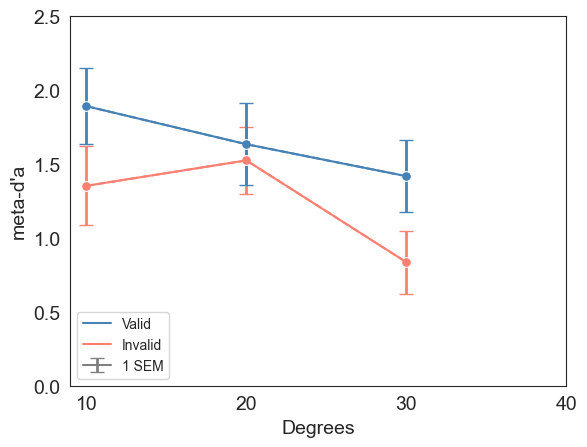

In [59]:
plot_function_b("meta-d'a","metadprimeusings", y_ticks=[0,0.5,1,1.5,2,2.5])

/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_83674/3671698804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['degrees'] = pd.to_numeric(final_df['degrees'])
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anacon

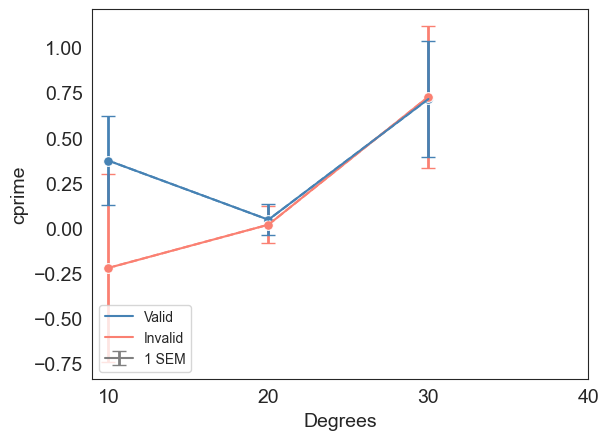

In [60]:
plot_function_b("cprime","cprime")

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

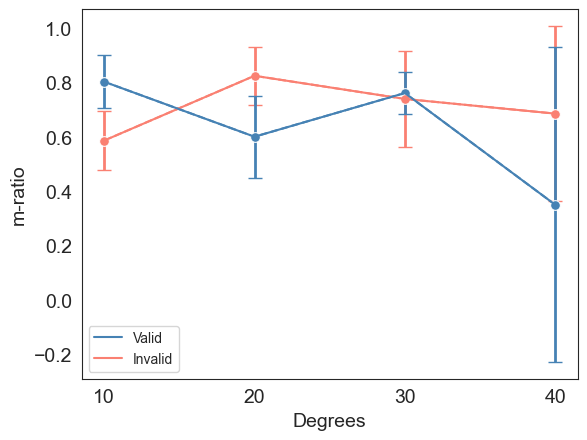

In [23]:
plot_function_b('m-ratio',"mratio")

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

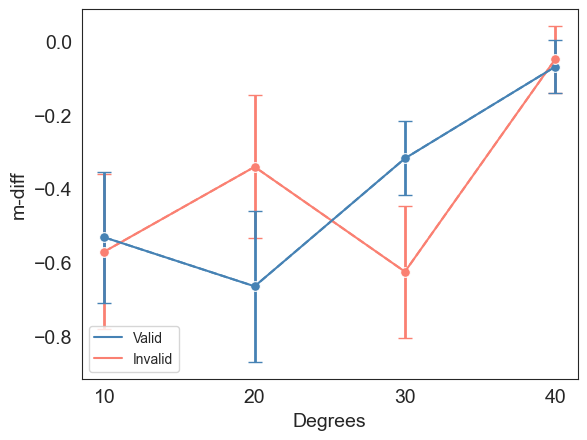

In [24]:
plot_function_b('m-diff',"mdiff")

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

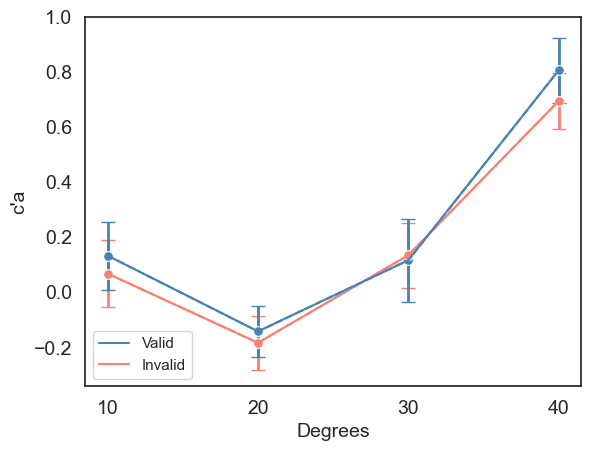

In [33]:
plot_function_b("c'a","criteriona", y_ticks=[-0.2,0,0.2,0.4,0.6,0.8,1.0]) 

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

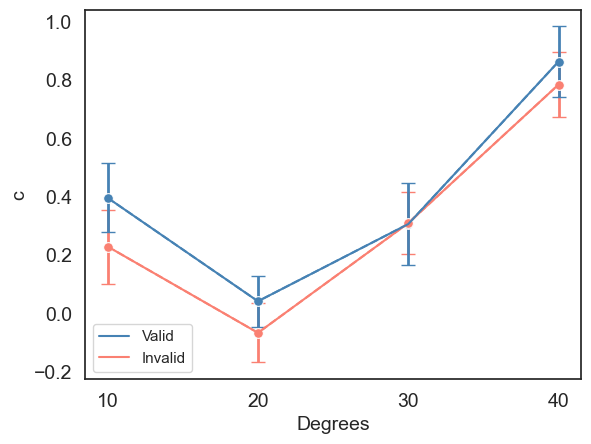

In [34]:
plot_function_b("c","criterion") 

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

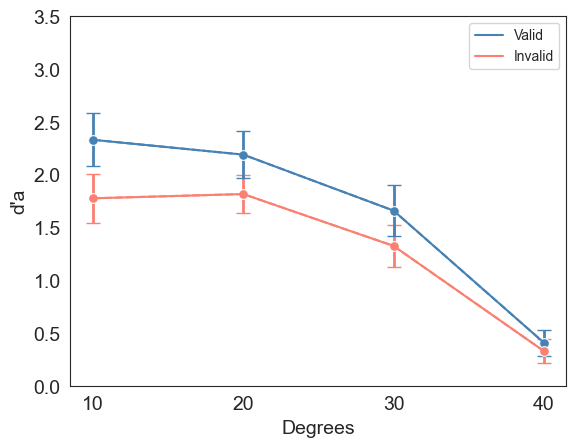

In [32]:
plot_function_b("d'a","dprimea", significance_degrees=[10,20,30],off=-0.5,y_ticks=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]) 

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

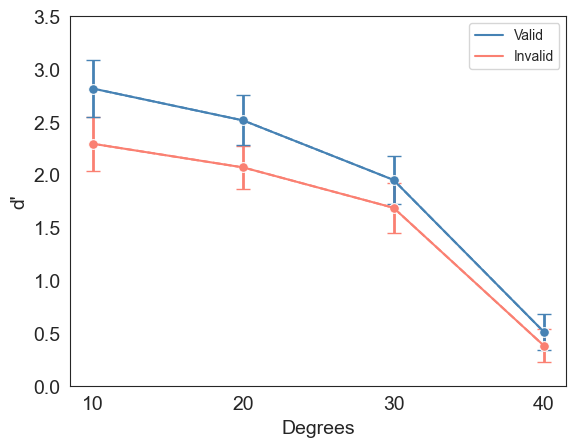

In [31]:
plot_function_b("d'","dprime", significance_degrees=[10,20],off=-0.1,y_ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]) 

In [ ]:
final_df

prefix,subjectid,degrees,validity,falsealarms,avgincorrectconf,dprimea,criteriona,mratio,s,metadprimeusings,avgconf,hitrate,mdiff,dprime,avgcorrectconf,criterion
0,1,10.0,Invalid,0.041667,2.666667,1.891444,-0.020958,0.903190,0.449696,1.714046,3.416667,0.791667,-0.183723,2.543882,3.523810,0.459723
1,1,10.0,Valid,0.037037,2.807692,2.083517,-0.103029,0.993468,0.374067,1.932129,3.587963,0.796296,-0.012703,2.614620,3.694737,0.478845
2,1,20.0,Invalid,0.250000,2.000000,2.124094,-0.020958,1.179654,0.766054,2.349914,3.000000,0.916667,0.357877,2.057484,3.200000,-0.354252
3,1,20.0,Valid,0.101852,2.666667,2.084213,-0.248171,0.299322,0.625765,0.748341,3.129630,0.907407,-1.751779,2.596028,3.179487,-0.026944
4,1,30.0,Invalid,0.125000,2.300000,1.242983,0.280706,0.239090,1.119165,0.390530,2.625000,0.708333,-1.242870,1.698872,2.710526,0.300914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,33,20.0,Valid,0.240741,2.175000,1.750116,-0.400420,0.727892,0.615156,1.350708,2.587963,0.870370,-0.504936,1.832065,2.681818,-0.212111
188,33,30.0,Invalid,0.166667,1.875000,0.774553,0.339895,0.878037,0.710005,0.658028,2.104167,0.500000,-0.091403,0.967422,2.218750,0.483711
189,33,30.0,Valid,0.120370,1.819672,0.924511,0.309055,0.776105,0.568038,0.758748,2.060185,0.555556,-0.218888,1.312848,2.154839,0.516714
190,33,40.0,Invalid,0.208333,1.500000,-0.339156,0.932699,0.854090,0.915119,-0.332967,1.458333,0.125000,0.056883,-0.338132,1.409091,0.981284


In [25]:
# Assuming 'final_df' is your DataFrame
grouped_df = final_df.groupby(['degrees', 'validity'])

# Compute mean, standard deviation, standard error, and coefficient of variation
mean_criteriona = grouped_df['criteriona'].mean()
std_criteriona = grouped_df['criteriona'].std()
se_criteriona = grouped_df['criteriona'].sem()

# Create a new DataFrame to store the results
stats_df = pd.DataFrame({
    'Mean_CriterionA': mean_criteriona,
    'Std_CriterionA': std_criteriona,
    'SE_CriterionA': se_criteriona,
}).reset_index()

# Display or save the results as needed
custom_order = ['Valid', 'Invalid']

# Sort stats_df by 'validity' using the custom order
stats_df_sorted = stats_df.sort_values(by='validity', key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

# Display or save the sorted DataFrame
stats_df_sorted


,degrees,validity,Mean_CriterionA,Std_CriterionA,SE_CriterionA
1,10.0,Valid,0.132349,0.605416,0.123580
3,20.0,Valid,-0.142705,0.450663,0.091991
5,30.0,Valid,0.115538,0.733988,0.149825
7,40.0,Valid,0.804736,0.578891,0.118166
0,10.0,Invalid,0.067073,0.596844,0.121830
2,20.0,Invalid,-0.184062,0.478008,0.097573
4,30.0,Invalid,0.133654,0.574421,0.117253
6,40.0,Invalid,0.693524,0.503633,0.102804


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named md_all
sem_values = md_all.groupby(['degrees', 'validity'])['False Alarm Rate'].sem().reset_index()

# Create a bar plot
ax = sns.barplot(x='degrees', y='False Alarm Rate', hue='validity', ci=None, data=md_all, palette=custom_palette, capsize=0.1, saturation=1)

# Plot error bars (SEM as confidence interval)
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['False Alarm Rate']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

x_pos_10_deg = (ax.patches[0].get_x() + ax.patches[4].get_width() / 2) + 0.2
plt.text(x=x_pos_10_deg, y=ax.patches[0].get_height() + 0.15, s='*', color='black', ha='center', va='center', fontsize=16)

# Manually add black asterisk above the tick for 20 degrees
x_pos_20_deg = (ax.patches[1].get_x() + ax.patches[5].get_x() / 2) - 0.12
plt.text(x=x_pos_20_deg, y=ax.patches[5].get_height() + 0.06, s='*', color='black', ha='center', va='center', fontsize=16)

# Customize labels and title
plt.xlabel("Degrees", fontsize=14)
plt.ylabel("False Alarm Rate", fontsize=14)
plt.legend(title='', loc='upper right')
# Set x-ticks and labels
plt.xticks([x_pos_10_deg, x_pos_20_deg], [10, 20])

plt.yticks([0, 0.1, 0.2, 0.3],fontsize=14)

# Save the plot
plt.savefig(out_path/'FAR.jpg', bbox_inches='tight', format='jpeg', dpi=1000)

NameError: name 'md_all' is not defined

In [27]:
sem_values = md_all.groupby(['degrees', 'validity'])['Hit Rate'].sem().reset_index()
ax = sns.barplot(x='degrees', y='Hit Rate', hue='validity', ci=None, data=md_all, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['Hit Rate']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=14)
plt.ylabel("Hit Rate", fontsize=14)

legend_labels = ["Valid", "Invalid"]  # Custom order of labels
handles, _ = ax.get_legend_handles_labels()  # Get the original handles and labels
custom_legend = ax.legend(handles, legend_labels, title="Legend")
plt.yticks([0,0.2,0.4,0.6,0.8,1.0], fontsize=14)
plt.xticks(fontsize=14)
plt.legend(title='', loc='upper right')
plt.savefig(out_path/'HitRate.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

NameError: name 'md_all' is not defined

EXTRA ANALYSES

In [28]:
df

,trialsN,participant,validity,Stimuli,Responses,response_rt,Accuracy,Confidence,confidence_rt,degrees,trialsPos,correct,Correct_Valid
0,1,1,Valid,1,0,NaN,0,2,13.754579,30,1,Incorrect,Incorrect & Valid
695,3,1,Invalid,0,0,0.671892,1,2,3.696378,40,180,Correct,Correct & Invalid
696,4,1,Valid,0,0,1.148633,1,3,4.146548,20,179,Correct,Correct & Valid
697,5,1,Valid,0,0,0.996028,1,4,2.828065,10,168,Correct,Correct & Valid
698,6,1,Valid,0,0,0.998505,1,4,2.746543,10,169,Correct,Correct & Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,388,33,Valid,1,1,0.654137,1,3,1.962655,20,251,Correct,Correct & Valid
22738,389,33,Valid,0,0,0.887439,1,2,2.195676,40,253,Correct,Correct & Valid
22739,390,33,Invalid,0,0,0.887600,1,1,2.195808,40,254,Correct,Correct & Invalid
22726,377,33,Valid,0,0,1.737677,1,1,3.046150,40,248,Correct,Correct & Valid


/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_30307/274910520.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

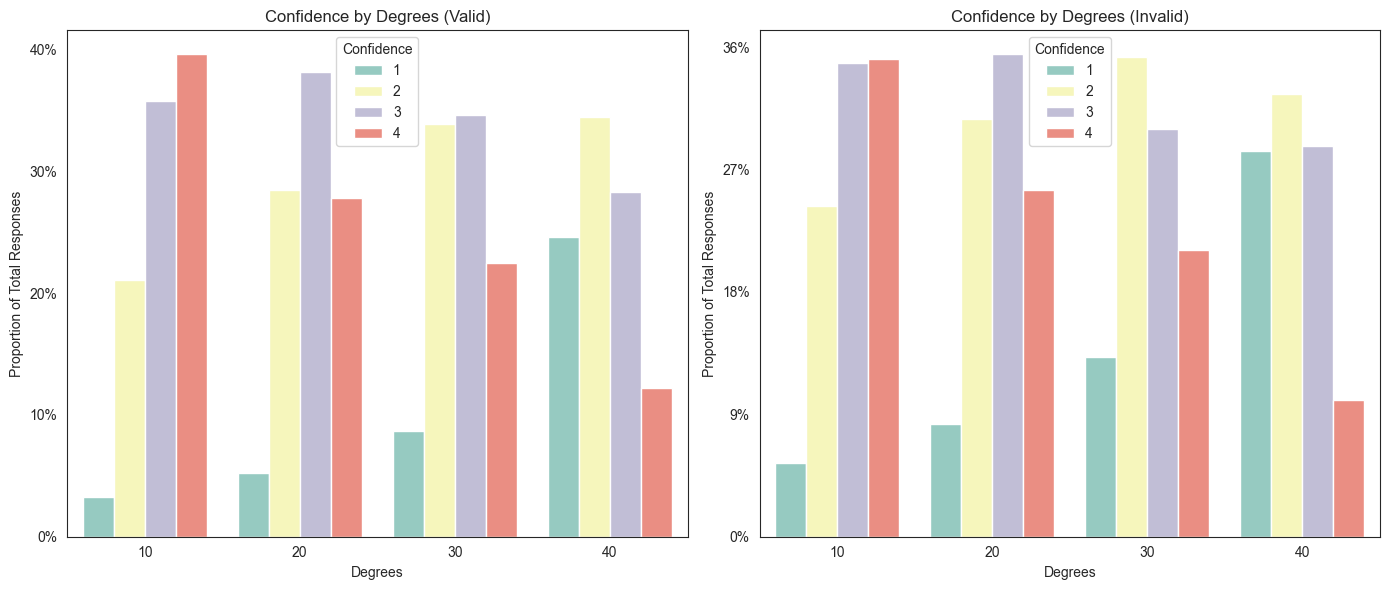

In [29]:
#CONFIDENCE FREQUENCY

plt.figure(figsize=(14, 6))

total_responses_valid = df[df['validity'] == 'Valid'].groupby(['degrees', 'Confidence']).size().reset_index(name='total_responses')
total_responses_invalid = df[df['validity'] == 'Invalid'].groupby(['degrees', 'Confidence']).size().reset_index(name='total_responses')

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='degrees', y='total_responses', hue='Confidence', data=total_responses_valid, palette='Set3', order=[10, 20, 30, 40])
plt.xlabel('Degrees')
plt.ylabel('Proportion of Total Responses')
plt.title('Confidence by Degrees (Valid)')

# Adjust y-axis ticks
ax1.set_yticklabels(['{:,.0%}'.format(y * 8) for y in ax1.get_yticks() / len(df[df['validity'] == 'Valid'])])
ax1.set_yticks(ax1.get_yticks()[::2])  # Display every second tick for better readability

# Plotting for 'Invalid'
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='degrees', y='total_responses', hue='Confidence', data=total_responses_invalid, palette='Set3', order=[10, 20, 30, 40])
plt.xlabel('Degrees')
plt.ylabel('Proportion of Total Responses')
plt.title('Confidence by Degrees (Invalid)')

# Adjust y-axis ticks
ax2.set_yticklabels(['{:,.0%}'.format(y * 8) for y in ax2.get_yticks() / len(df[df['validity'] == 'Invalid'])])
ax2.set_yticks(ax2.get_yticks()[::2])  # Display every second tick for better readability

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_30307/2195658922.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='degrees', y='Confidence', hue='Stimuli', ci=None, data=df_valid, capsize=0.1, saturation=1, ax=axes[0])
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remove

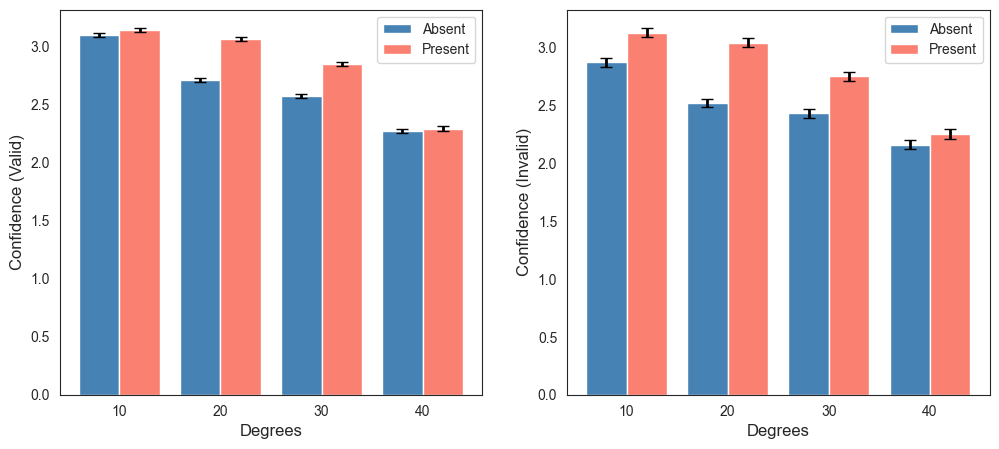

In [30]:
# Confidence by Stimulus PResence
df_valid = df[df['validity'] == 'Valid'].copy()
df_invalid = df[df['validity'] == 'Invalid'].copy()

# Calculate SEM for 'Valid'
sem_values_valid = df_valid.groupby(['degrees', 'Stimuli'])['Confidence'].sem().reset_index()

# Calculate SEM for 'Invalid'
sem_values_invalid = df_invalid.groupby(['degrees', 'Stimuli'])['Confidence'].sem().reset_index()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a bar plot for 'Valid'
ax1 = sns.barplot(x='degrees', y='Confidence', hue='Stimuli', ci=None, data=df_valid, capsize=0.1, saturation=1, ax=axes[0])

# Plot error bars (SEM as confidence interval) for 'Valid'
for i, bar in enumerate(ax1.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values_valid)
    yerr = sem_values_valid.iloc[hue_index]['Confidence']
    ax1.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Create a bar plot for 'Invalid'
ax2 = sns.barplot(x='degrees', y='Confidence', hue='Stimuli', ci=None, data=df_invalid, capsize=0.1, saturation=1, ax=axes[1])

# Plot error bars (SEM as confidence interval) for 'Invalid'
for i, bar in enumerate(ax2.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values_invalid)
    yerr = sem_values_invalid.iloc[hue_index]['Confidence']
    ax2.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

for ax in [ax1, ax2]:
    ax.legend(title='', labels=['Absent', 'Present'], loc='upper right')

# Customize labels and title
ax1.set_xlabel("Degrees", fontsize=12)
ax1.set_ylabel("Confidence (Valid)", fontsize=12)
ax2.set_xlabel("Degrees", fontsize=12)
ax2.set_ylabel("Confidence (Invalid)", fontsize=12)

# Save the plot
plt.savefig(out_path/'Conf.jpg', bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

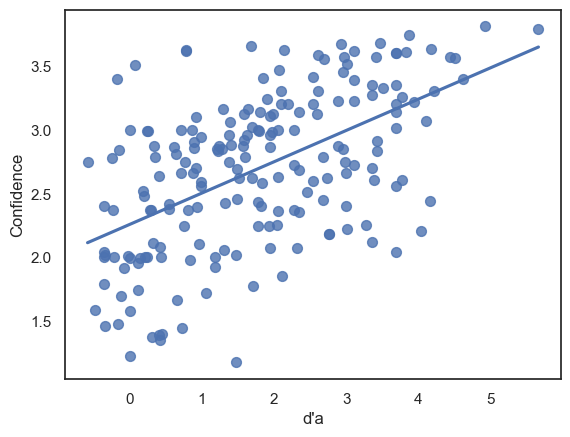

In [31]:
# TOTAL DATA
sns.set(style="white")

# Create a regression plot
sns.regplot(x='dprime', y='avgconf', data=final_df, scatter_kws={'s': 50}, ci=None)

# Customize labels and title
plt.xlabel("d'a")
plt.ylabel('Confidence')
plt.savefig(out_path/'AvgConfReg.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
# Show the plot
plt.show()

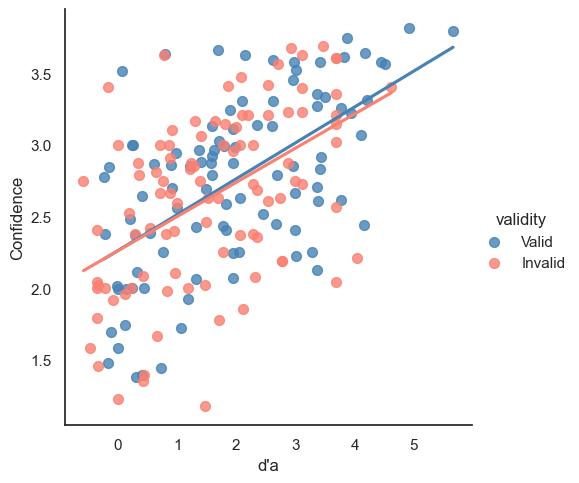

In [32]:
#SEPARATED BY VALID AND INVALID
from scipy.stats import pearsonr
sns.set(style="white")
custom_palette = {'Valid': 'steelblue', 'Invalid': 'salmon'}

# Create a regression plot with hue
sns.lmplot(x='dprime', y='avgconf', data=final_df, scatter_kws={'s': 50}, ci=None, hue='validity', hue_order=['Valid', 'Invalid'], palette=custom_palette)

# Customize labels and title
plt.xlabel("d'a")
plt.ylabel('Confidence')

# Show the plot
plt.savefig(out_path/'ConfByDprime.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
plt.show()

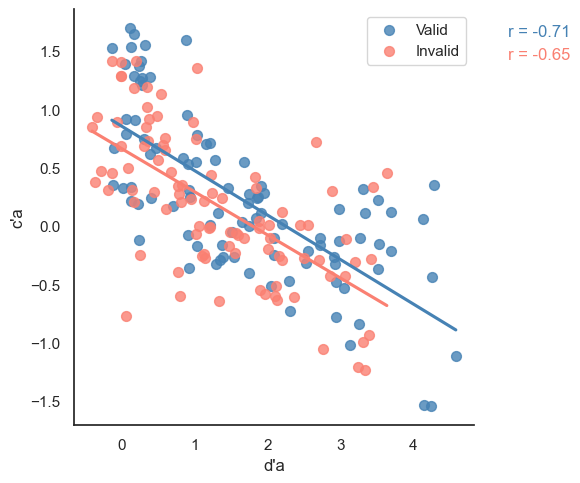

In [33]:
#SEPARATED BY VALID AND INVALID
sns.set(style="white")

# Create a regression plot with hue
sns.lmplot(x='dprimea', y='criteriona', data=final_df, scatter_kws={'s': 50}, ci=None, hue='validity', hue_order=['Valid', 'Invalid'], palette=custom_palette, legend=False)

correlation_valid_total, p_value_valid_total = pearsonr(final_df[final_df['validity'] == 'Valid']['dprimea'], final_df[final_df['validity'] == 'Valid']['criteriona'])
correlation_invalid_total, p_value_invalid_total = pearsonr(final_df[final_df['validity'] == 'Invalid']['dprimea'], final_df[final_df['validity'] == 'Invalid']['criteriona'])

plt.text(5.3, 1.6, f'r = {correlation_valid_total:.2f}', ha='left', va='bottom', fontsize=12, color='steelblue')
plt.text(5.3, 1.4, f'r = {correlation_invalid_total:.2f}', ha='left', va='bottom', fontsize=12, color='salmon')

# Customize labels and title
plt.xlabel("d'a")
plt.ylabel("c'a")
legend = plt.legend(title='')

# Show the plot
plt.savefig(out_path/'RegValidity.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
plt.show()

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


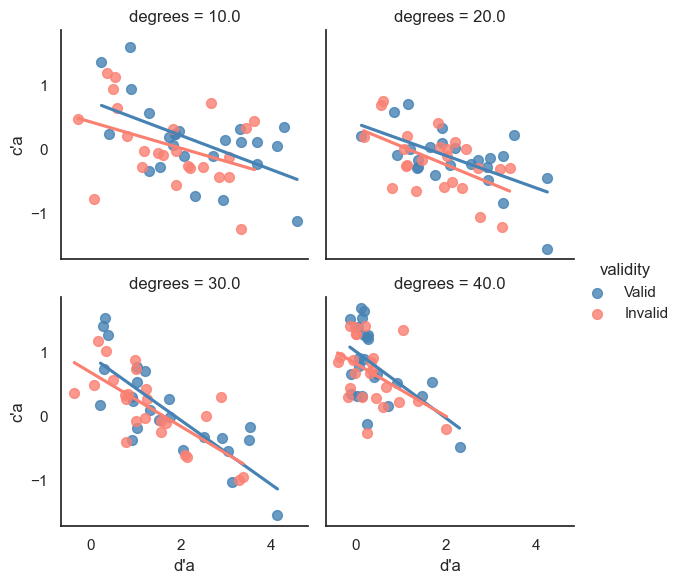

In [34]:
sns.set(style="white")

# Create a FacetGrid with separate regression plots for each degree
g = sns.FacetGrid(final_df, col='degrees', col_wrap=2, height=3, hue='validity', palette={'Valid': 'steelblue', 'Invalid': 'salmon'}, hue_order=['Valid', 'Invalid'])
g.map(sns.regplot, 'dprimea', 'criteriona', scatter_kws={'s': 50}, ci=None)


# Customize labels and title
g.set_axis_labels("d'a", "c'a")

# Add legend
g.add_legend(title='validity')
plt.savefig(out_path/'RegValidityDegrees.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
# Show the plot
plt.show()

In [35]:
final_df

prefix,subjectid,degrees,validity,criterion,hitrate,mdiff,criteriona,dprimea,falsealarms,s,mratio,avgincorrectconf,dprime,metadprimeusings,avgconf,avgcorrectconf
0,1,10.0,Invalid,0.459723,0.791667,-0.183723,-0.020958,1.891444,0.041667,0.449696,0.903190,2.666667,2.543882,1.714046,3.416667,3.523810
1,1,10.0,Valid,0.478845,0.796296,-0.012703,-0.103029,2.083517,0.037037,0.374067,0.993468,2.807692,2.614620,1.932129,3.587963,3.694737
2,1,20.0,Invalid,-0.354252,0.916667,0.357877,-0.511905,2.124094,0.250000,0.766054,1.179654,2.000000,2.057484,2.349914,3.000000,3.200000
3,1,20.0,Valid,-0.026944,0.907407,-1.751779,-0.248171,2.084213,0.101852,0.625765,0.299322,2.666667,2.596028,0.748341,3.129630,3.179487
4,1,30.0,Invalid,0.300914,0.708333,-1.242870,0.280706,1.242983,0.125000,1.119165,0.239090,2.300000,1.698872,0.390530,2.625000,2.710526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,33,20.0,Valid,-0.212111,0.870370,-0.504936,-0.400420,1.750116,0.240741,0.615156,0.727892,2.175000,1.832065,1.350708,2.587963,2.681818
188,33,30.0,Invalid,0.483711,0.500000,-0.091403,0.339895,0.774553,0.166667,0.710005,0.878037,1.875000,0.967422,0.658028,2.104167,2.218750
189,33,30.0,Valid,0.516714,0.555556,-0.218888,0.309055,0.924511,0.120370,0.568038,0.776105,1.819672,1.312848,0.758748,2.060185,2.154839
190,33,40.0,Invalid,0.981284,0.125000,0.056883,0.932699,-0.339156,0.208333,0.915119,0.854090,1.500000,-0.338132,-0.332967,1.458333,1.409091


In [54]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

In [55]:
degrees = [10, 20, 30, 40]

print('Total correlation values (ca & da)')
print(f'correlation (Valid) total: {correlation_valid_total:.2f},  p-value: {p_value_valid_total:.4f}')
print(f'correlation (Invalid) total: {correlation_invalid_total:.2f}, p-value: {p_value_invalid_total:.4f}')
print('\n')

for degree in degrees:
    # Filter DataFrame for the current degree
    degree_df = final_df[final_df['degrees'] == degree]

    # Calculate the correlation coefficients and p-values for each validity condition
    correlation_valid, p_value_valid = pearsonr(degree_df[degree_df['validity'] == 'Valid']['dprimea'], degree_df[degree_df['validity'] == 'Valid']['criteriona'])
    correlation_invalid, p_value_invalid = pearsonr(degree_df[degree_df['validity'] == 'Invalid']['dprimea'], degree_df[degree_df['validity'] == 'Invalid']['criteriona'])

    # Print the results
    print(f'Degree {degree}:')
    print(f'Correlation (Valid): {correlation_valid:.2f}, p-value: {p_value_valid:.4f}')
    print(f'Correlation (Invalid): {correlation_invalid:.2f}, p-value: {p_value_invalid:.4f}')
    print('\n')

Total correlation values (ca & da)
correlation (Valid) total: 0.60,  p-value: 0.0000
correlation (Invalid) total: 0.49, p-value: 0.0000


Degree 10:
Correlation (Valid): -0.45, p-value: 0.0319
Correlation (Invalid): -0.45, p-value: 0.0322


Degree 20:
Correlation (Valid): -0.61, p-value: 0.0017
Correlation (Invalid): -0.54, p-value: 0.0062


Degree 30:
Correlation (Valid): -0.80, p-value: 0.0000
Correlation (Invalid): -0.72, p-value: 0.0001


Degree 40:
Correlation (Valid): -0.55, p-value: 0.0058
Correlation (Invalid): -0.46, p-value: 0.0233




In [56]:
print('Total correlation values (correct confidence and da)')
final_df
correlation_valid_total, p_value_valid_total = pearsonr(final_df[final_df['validity'] == 'Valid']['dprimea'], final_df[final_df['validity'] == 'Valid']['avgcorrectconf'])
correlation_invalid_total, p_value_invalid_total = pearsonr(final_df[final_df['validity'] == 'Invalid']['dprimea'], final_df[final_df['validity'] == 'Invalid']['avgcorrectconf'])

print(f'correlation (Valid) total: {correlation_valid_total:.2f},  p-value: {p_value_valid_total:.4f}')
print(f'correlation (Invalid) total: {correlation_invalid_total:.2f}, p-value: {p_value_invalid_total:.4f}')
print('\n')

for degree in degrees:
    # Filter DataFrame for the current degree
    degree_df = final_df[final_df['degrees'] == degree]

    # Calculate the correlation coefficients and p-values for each validity condition
    correlation_valid, p_value_valid = pearsonr(degree_df[degree_df['validity'] == 'Valid']['dprimea'], degree_df[degree_df['validity'] == 'Valid']['avgcorrectconf'])
    correlation_invalid, p_value_invalid = pearsonr(degree_df[degree_df['validity'] == 'Invalid']['dprimea'], degree_df[degree_df['validity'] == 'Invalid']['avgcorrectconf'])

    # Print the results
    print(f'Degree {degree}:')
    print(f'Correlation (Valid): {correlation_valid:.2f}, p-value: {p_value_valid:.4f}')
    print(f'Correlation (Invalid): {correlation_invalid:.2f}, p-value: {p_value_invalid:.4f}')
    print('\n')

Total correlation values (correct confidence and da)
correlation (Valid) total: 0.59,  p-value: 0.0000
correlation (Invalid) total: 0.50, p-value: 0.0000


Degree 10:
Correlation (Valid): 0.62, p-value: 0.0014
Correlation (Invalid): 0.54, p-value: 0.0085


Degree 20:
Correlation (Valid): 0.39, p-value: 0.0595
Correlation (Invalid): 0.22, p-value: 0.2930


Degree 30:
Correlation (Valid): 0.42, p-value: 0.0431
Correlation (Invalid): 0.39, p-value: 0.0601


Degree 40:
Correlation (Valid): 0.34, p-value: 0.1072
Correlation (Invalid): 0.18, p-value: 0.3873




In [57]:
print('Total correlation values (incorrect confidence and da)')

correlation_valid_total, p_value_valid_total = pearsonr(final_df[final_df['validity'] == 'Valid']['dprimea'], final_df[final_df['validity'] == 'Valid']['avgincorrectconf'])
correlation_invalid_total, p_value_invalid_total = pearsonr(final_df[final_df['validity'] == 'Invalid']['dprimea'], final_df[final_df['validity'] == 'Invalid']['avgincorrectconf'])

print(f'correlation (Valid) total: {correlation_valid_total:.2f},  p-value: {p_value_valid_total:.4f}')
print(f'correlation (Invalid) total: {correlation_invalid_total:.2f}, p-value: {p_value_invalid_total:.4f}')
print('\n')

for degree in degrees:
    # Filter DataFrame for the current degree
    degree_df = final_df[final_df['degrees'] == degree]

    # Calculate the correlation coefficients and p-values for each validity condition
    correlation_valid, p_value_valid = pearsonr(degree_df[degree_df['validity'] == 'Valid']['dprimea'], degree_df[degree_df['validity'] == 'Valid']['avgincorrectconf'])
    correlation_invalid, p_value_invalid = pearsonr(degree_df[degree_df['validity'] == 'Invalid']['dprimea'], degree_df[degree_df['validity'] == 'Invalid']['avgincorrectconf'])

    # Print the results
    print(f'Degree {degree}:')
    print(f'Correlation (Valid): {correlation_valid:.2f}, p-value: {p_value_valid:.4f}')
    print(f'Correlation (Invalid): {correlation_invalid:.2f}, p-value: {p_value_invalid:.4f}')
    print('\n')

Total correlation values (incorrect confidence and da)
correlation (Valid) total: -0.15,  p-value: 0.1432
correlation (Invalid) total: -0.27, p-value: 0.0088


Degree 10:
Correlation (Valid): -0.31, p-value: 0.1515
Correlation (Invalid): -0.59, p-value: 0.0033


Degree 20:
Correlation (Valid): -0.40, p-value: 0.0549
Correlation (Invalid): -0.49, p-value: 0.0160


Degree 30:
Correlation (Valid): -0.41, p-value: 0.0479
Correlation (Invalid): -0.24, p-value: 0.2569


Degree 40:
Correlation (Valid): 0.09, p-value: 0.6805
Correlation (Invalid): -0.14, p-value: 0.5113




In [58]:
print('Total correlation values (confidence and da)')

correlation_valid_total, p_value_valid_total = pearsonr(final_df[final_df['validity'] == 'Valid']['dprimea'], final_df[final_df['validity'] == 'Valid']['avgconf'])
correlation_invalid_total, p_value_invalid_total = pearsonr(final_df[final_df['validity'] == 'Invalid']['dprimea'], final_df[final_df['validity'] == 'Invalid']['avgconf'])

print(f'correlation (Valid) total: {correlation_valid_total:.2f},  p-value: {p_value_valid_total:.4f}')
print(f'correlation (Invalid) total: {correlation_invalid_total:.2f}, p-value: {p_value_invalid_total:.4f}')
print('\n')

for degree in degrees:
    # Filter DataFrame for the current degree
    degree_df = final_df[final_df['degrees'] == degree]

    # Calculate the correlation coefficients and p-values for each validity condition
    correlation_valid, p_value_valid = pearsonr(degree_df[degree_df['validity'] == 'Valid']['dprimea'], degree_df[degree_df['validity'] == 'Valid']['avgconf'])
    correlation_invalid, p_value_invalid = pearsonr(degree_df[degree_df['validity'] == 'Invalid']['dprimea'], degree_df[degree_df['validity'] == 'Invalid']['avgconf'])

    # Print the results
    print(f'Degree {degree}:')
    print(f'Correlation (Valid): {correlation_valid:.2f}, p-value: {p_value_valid:.4f}')
    print(f'Correlation (Invalid): {correlation_invalid:.2f}, p-value: {p_value_invalid:.4f}')
    print('\n')

Total correlation values (confidence and da)
correlation (Valid) total: 0.58,  p-value: 0.0000
correlation (Invalid) total: 0.47, p-value: 0.0000


Degree 10:
Correlation (Valid): 0.65, p-value: 0.0009
Correlation (Invalid): 0.50, p-value: 0.0157


Degree 20:
Correlation (Valid): 0.42, p-value: 0.0429
Correlation (Invalid): 0.23, p-value: 0.2745


Degree 30:
Correlation (Valid): 0.41, p-value: 0.0444
Correlation (Invalid): 0.39, p-value: 0.0604


Degree 40:
Correlation (Valid): 0.30, p-value: 0.1567
Correlation (Invalid): 0.12, p-value: 0.5888




/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


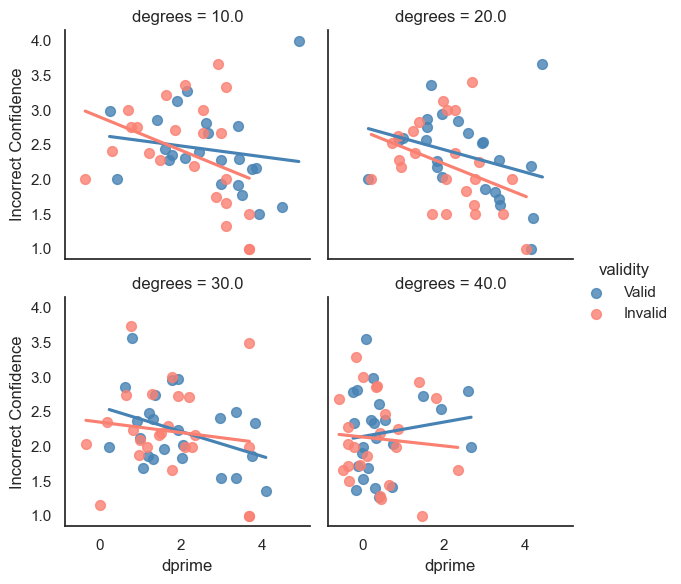

In [81]:
sns.set(style="white")

# Create a FacetGrid with separate regression plots for each degree
g = sns.FacetGrid(final_df, col='degrees', col_wrap=2, height=3, hue='validity',
                  palette={'Valid': 'steelblue', 'Invalid': 'salmon'}, hue_order=['Valid', 'Invalid'])
g.map(sns.regplot, 'dprime', 'avgincorrectconf', scatter_kws={'s': 50}, ci=None)

# Customize labels and title
g.set_axis_labels('dprime', 'Incorrect Confidence')

# Add legend
g.add_legend(title='validity')

# Show the plot
plt.savefig(out_path/'IncorrectConfReg.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
plt.show()

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


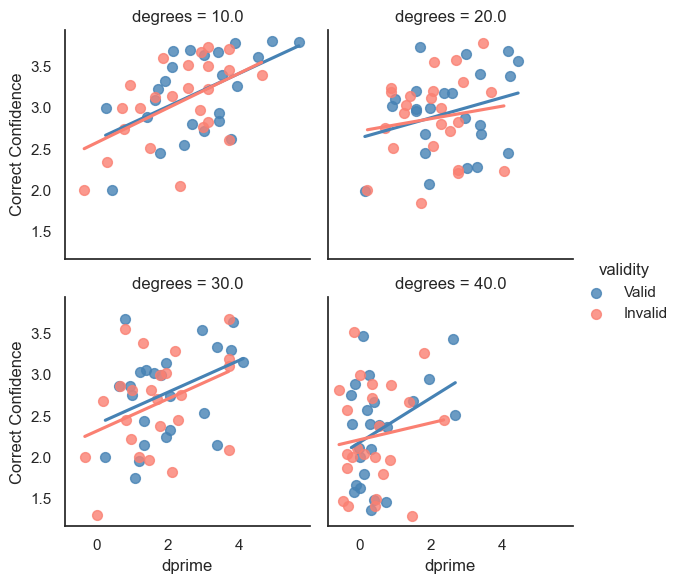

In [82]:
sns.set(style="white")

g = sns.FacetGrid(final_df, col='degrees', col_wrap=2, height=3, hue='validity',
                  palette={'Valid': 'steelblue', 'Invalid': 'salmon'}, hue_order=['Valid', 'Invalid'])
g.map(sns.regplot, 'dprime', 'avgcorrectconf', scatter_kws={'s': 50}, ci=None)

# Customize labels and title
g.set_axis_labels('dprime', 'Correct Confidence')

# Add legend
g.add_legend(title='validity')
plt.savefig(out_path/'CorrectConfReg.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
plt.show()

# Show the plot

/var/folders/km/27ljlcys2rsbd7l3ry_4qfyr_h8yf6/T/ipykernel_50182/2617919017.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='degrees', y='response_rt', hue='Confidence', ci=None, palette='pastel', data=df, capsize=0.1,saturation=1)
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

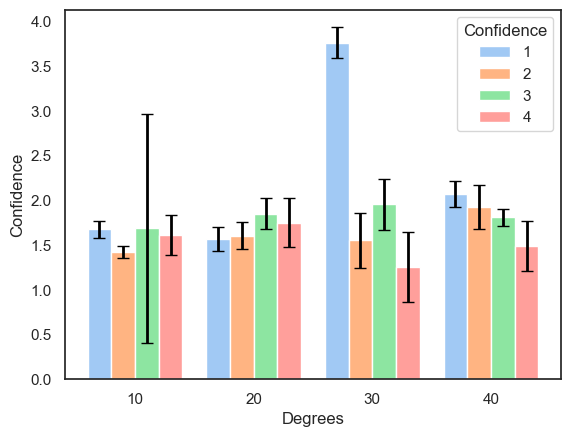

In [80]:
# Define custom color palette
sem_values = df.groupby(['degrees', 'Confidence'])['response_rt'].sem().reset_index()
ax = sns.barplot(x='degrees', y='response_rt', hue='Confidence', ci=None, palette='pastel', data=df, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['response_rt']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("Confidence", fontsize=12)

plt.savefig(out_path/'ConfByDegrees.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()

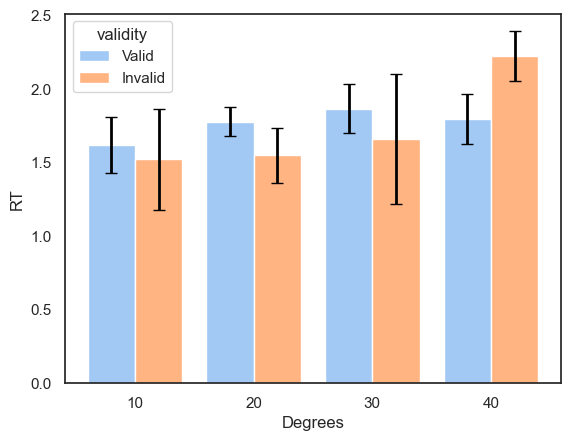

In [ ]:
# Define custom color palette
sem_values = df.groupby(['degrees', 'validity'])['response_rt'].sem().reset_index()
ax = sns.barplot(x='degrees', y='response_rt', hue='validity', ci=None, palette='pastel', data=df, capsize=0.1,saturation=1)

for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    hue_index = i % len(sem_values)
    yerr = sem_values.iloc[hue_index]['response_rt']
    plt.errorbar(x, y, yerr, fmt='none', ecolor='black', elinewidth=2, capsize=4)

# Customize labels and title
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("RT", fontsize=12)

plt.savefig(out_path/'RT.jpg',bbox_inches='tight', format='jpeg', dpi=1000)
plt.savefig(out_path/'RTDegrees.jpg',bbox_inches='tight', format='jpeg', dpi=1000)

# Show the plot
plt.show()